In [ ]:
!pip install scikit-learn==0.24.2

In [ ]:
!pip freeze | grep scikit-learn

In [ ]:
from sklearn.datasets import make_classification
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns

from lightgbm import LGBMClassifier

%load_ext autoreload
%autoreload 2

In [ ]:
train_df = pd.read_csv("/content/train_dataset.csv", index_col=0)

In [ ]:
train_df.shape

In [ ]:
predictors_df = train_df.drop('label', axis = 1)
labels = train_df['label']

In [ ]:
train_df.head()

In [ ]:
test_df = pd.read_csv("test_dataset.csv", index_col=0)

In [ ]:
test_df.shape

In [ ]:
test_df.head()

In [ ]:
X = train_df('label', axis = 1)

In [ ]:
X

array([[ 1.0641922 , -0.23391503, -0.08662348, ...,  1.15356343,
         1.90825411,  0.43338862],
       [-0.43339018, -1.10148376, -2.84457215, ..., -0.02208631,
         1.85096375, -1.03040574],
       [ 0.59375096, -0.40894189, -0.40884659, ..., -2.03424886,
         1.77681655,  1.5449848 ],
       ...,
       [-0.65551914,  0.84583962, -0.45865067, ...,  1.35746137,
        -0.6972262 ,  0.27835817],
       [ 2.08844856, -0.29225522,  2.73090886, ...,  1.46445431,
         0.80500111, -0.25593056],
       [ 0.4969004 ,  1.22780343,  1.53242248, ...,  0.0427829 ,
         0.02054433,  0.02186574]])

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(X)

<Axes: >

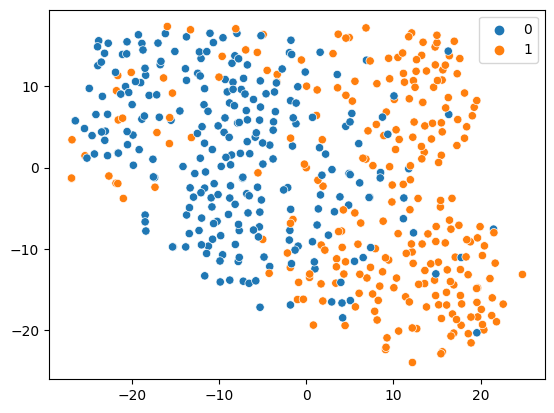

In [ ]:
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y)

In [ ]:
model = LGBMClassifier(max_depth=5, n_estimators=500)

In [ ]:
X = pd.DataFrame(data=X, columns=[f'feature_{i}' for i in np.arange(X.shape[1])], index=np.arange(500))

In [ ]:
X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
0,1.064192,-0.233915,-0.086623,1.321959,-2.164310,0.653193,1.244775,-0.328599,0.429563,-1.520541,-1.865545,-2.345773,-1.416434,1.028654,-0.518608,-0.272394,-1.507347,1.153563,1.908254,0.433389
1,-0.433390,-1.101484,-2.844572,2.420722,-1.188535,-0.362603,0.790185,1.988820,-0.287558,-0.603980,-0.777533,-3.609638,-2.034682,1.161609,-0.781504,2.607526,-1.666672,-0.022086,1.850964,-1.030406
2,0.593751,-0.408942,-0.408847,1.250589,0.517230,-0.503244,1.517552,1.266847,-0.308677,0.374486,1.047514,-2.096240,-0.365183,-2.852944,-1.242249,-0.642691,-0.691338,-2.034249,1.776817,1.544985
3,0.124968,0.187539,-0.333420,0.186774,0.381966,-0.700537,-1.101084,-0.821470,-0.095310,0.559700,0.760118,-0.332511,1.004377,1.054412,1.622498,1.941699,-1.350404,0.531097,-0.288665,0.416930
4,0.886330,-0.007981,-0.043005,1.173083,0.723348,-1.700176,1.496271,1.645382,0.918031,0.447252,0.204414,-2.062045,0.969041,-0.790170,-0.157421,-0.826806,-0.921016,1.126348,1.836835,0.687067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.669455,-0.456303,1.280833,-0.217668,0.479442,0.365371,1.677248,-0.069753,1.058781,0.488927,-0.917155,0.152060,1.528929,0.669808,-0.151734,-3.147401,1.094325,-1.134280,0.849188,0.198132
496,-0.117763,1.252496,-2.920045,2.900454,1.621648,2.565652,1.350929,1.634141,-0.332085,-0.213896,0.107486,-4.439571,0.980263,-0.430818,0.253008,2.364255,-2.041752,-0.056015,2.560444,0.318068
497,-0.655519,0.845840,-0.458651,-0.284120,-0.839482,-0.678152,-0.517229,1.322167,2.891703,-0.566632,-0.157842,0.627160,0.746249,-0.536082,1.791671,0.588666,0.535492,1.357461,-0.697226,0.278358
498,2.088449,-0.292255,2.730909,-0.495300,1.370410,1.018157,0.631710,1.429458,0.353548,-1.199860,0.014244,0.159747,0.153102,-1.576352,-0.561588,-2.436001,-0.993230,1.464454,0.805001,-0.255931


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

In [ ]:
scores = cross_val_score(model, X, y, cv=5)

In [ ]:
scores

array([0.87, 0.84, 0.79, 0.89, 0.86])

In [ ]:
scores.mean()

0.85

In [ ]:
model.fit(X_train, y_train)

LGBMClassifier(max_depth=5, n_estimators=500)

In [ ]:
metrics.f1_score(model.predict(X_test), y_test)

0.8173913043478261

In [ ]:
from lightgbm import plot_importance

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

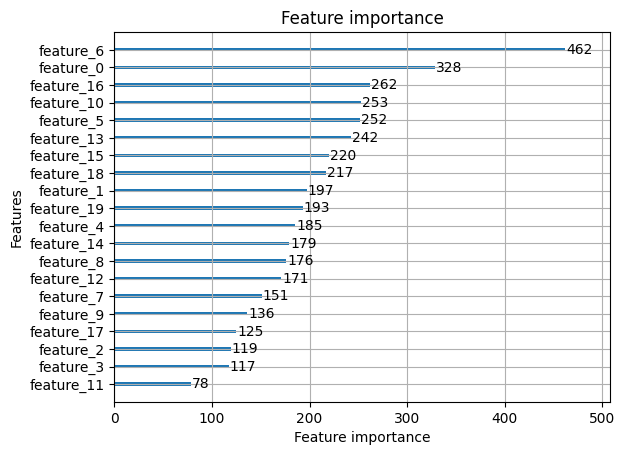

In [ ]:
plot_importance(model)

In [ ]:
model.fit(X_train.drop(columns=['feature_6', 'feature_0', 'feature_16']), y_train)

LGBMClassifier(max_depth=5, n_estimators=500)

In [ ]:
metrics.f1_score(model.predict(X_test.drop(columns=['feature_6', 'feature_0', 'feature_16'])), y_test)

0.7692307692307693

In [ ]:
model.fit(X_train.drop(columns=['feature_16']), y_train)

LGBMClassifier(max_depth=5, n_estimators=500)

In [ ]:
metrics.f1_score(model.predict(X_test.drop(columns=['feature_16'])), y_test)

0.7758620689655172

In [ ]:
for feature in ['feature_16', 'feature_0']:
    for i in range(10):
        X[f'{feature}_shuffled_{i}'] = np.random.permutation(X[feature])

<Axes: >

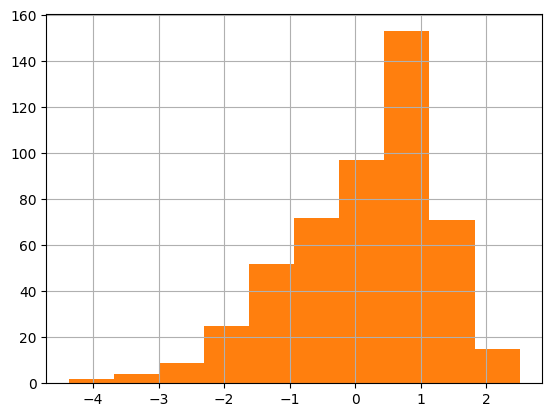

In [ ]:
X['feature_0_shuffled_2'].hist()

<Axes: >

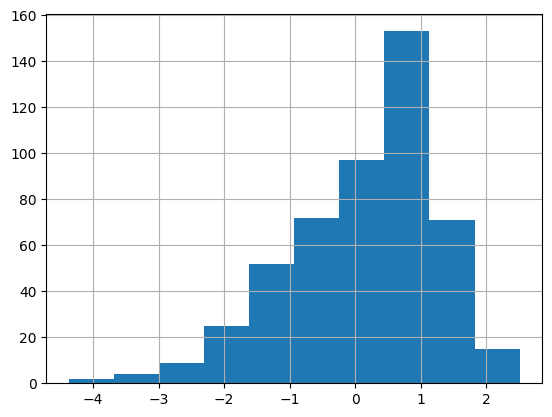

In [ ]:
X['feature_0_shuffled_4'].hist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

In [ ]:
scores = cross_val_score(model, X, y, cv=5)

In [ ]:
scores.mean()

0.8440000000000001

In [ ]:
model.fit(X_train, y_train)

LGBMClassifier(max_depth=5, n_estimators=500)

In [ ]:
metrics.f1_score(model.predict(X_test), y_test)

0.7787610619469026

In [ ]:
from lightgbm import plot_importance

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

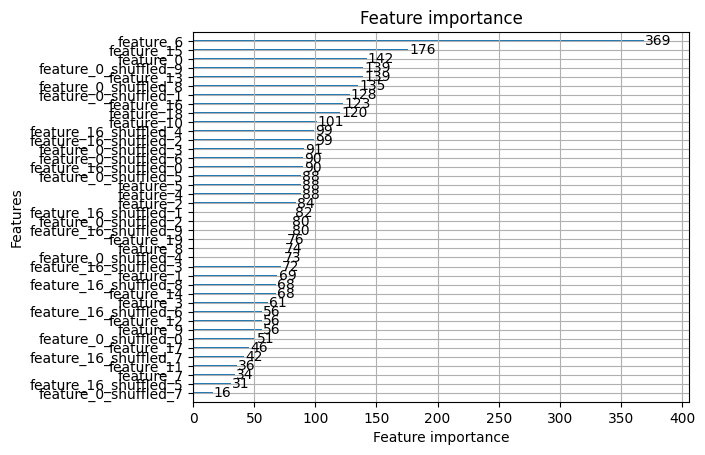

In [ ]:
plot_importance(model)

In [ ]:
X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_0_shuffled_0,feature_0_shuffled_1,feature_0_shuffled_2,feature_0_shuffled_3,feature_0_shuffled_4,feature_0_shuffled_5,feature_0_shuffled_6,feature_0_shuffled_7,feature_0_shuffled_8,feature_0_shuffled_9
0,1.064192,-0.233915,-0.086623,1.321959,-2.164310,0.653193,1.244775,-0.328599,0.429563,-1.520541,...,0.691475,1.634421,0.473275,1.531497,1.101668,0.177848,0.645174,0.249684,-0.499580,1.380666
1,-0.433390,-1.101484,-2.844572,2.420722,-1.188535,-0.362603,0.790185,1.988820,-0.287558,-0.603980,...,0.483625,0.182049,-0.440018,-0.111119,1.541370,-0.860947,1.279713,1.327315,-0.990609,-1.550074
2,0.593751,-0.408942,-0.408847,1.250589,0.517230,-0.503244,1.517552,1.266847,-0.308677,0.374486,...,-0.581913,0.000424,0.787111,1.565957,1.656880,0.463848,1.837092,1.272413,1.407112,0.745780
3,0.124968,0.187539,-0.333420,0.186774,0.381966,-0.700537,-1.101084,-0.821470,-0.095310,0.559700,...,-1.416748,1.380666,-1.416748,-0.716633,1.226086,-1.045194,-1.570334,1.271691,1.276579,0.405659
4,0.886330,-0.007981,-0.043005,1.173083,0.723348,-1.700176,1.496271,1.645382,0.918031,0.447252,...,1.686490,-1.140020,0.724017,0.534986,-1.764150,0.990458,0.099305,0.322427,0.882897,-0.529039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.669455,-0.456303,1.280833,-0.217668,0.479442,0.365371,1.677248,-0.069753,1.058781,0.488927,...,1.270530,1.536673,0.493427,0.608408,0.998092,0.356645,0.644226,-1.083568,-1.415130,-2.580328
496,-0.117763,1.252496,-2.920045,2.900454,1.621648,2.565652,1.350929,1.634141,-0.332085,-0.213896,...,1.385824,0.222680,-0.755907,-1.550074,-1.570334,0.941653,2.203474,1.011102,1.303789,0.747231
497,-0.655519,0.845840,-0.458651,-0.284120,-0.839482,-0.678152,-0.517229,1.322167,2.891703,-0.566632,...,0.967355,-0.059569,-0.702565,1.409183,-0.415895,2.031891,-0.352949,0.593751,-0.359641,0.524145
498,2.088449,-0.292255,2.730909,-0.495300,1.370410,1.018157,0.631710,1.429458,0.353548,-1.199860,...,0.282984,1.022961,0.742814,0.573331,-0.860947,0.391028,-0.990586,2.203474,0.144094,1.486546


In [ ]:
!pip install BorutaShap

In [ ]:
from BorutaShap import BorutaShap

In [ ]:
model = LGBMClassifier(max_depth=3)

In [ ]:
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

In [ ]:
Feature_Selector.fit(X=X, y=y, n_trials=100, sample=False,
            	     train_or_test = 'test', normalize=False,
		             verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

8 attributes confirmed important: ['feature_0', 'feature_8', 'feature_13', 'feature_15', 'feature_16', 'feature_6', 'feature_19', 'feature_18']
12 attributes confirmed unimportant: ['feature_7', 'feature_9', 'feature_17', 'feature_11', 'feature_5', 'feature_3', 'feature_12', 'feature_14', 'feature_2', 'feature_10', 'feature_1', 'feature_4']
0 tentative attributes remains: []


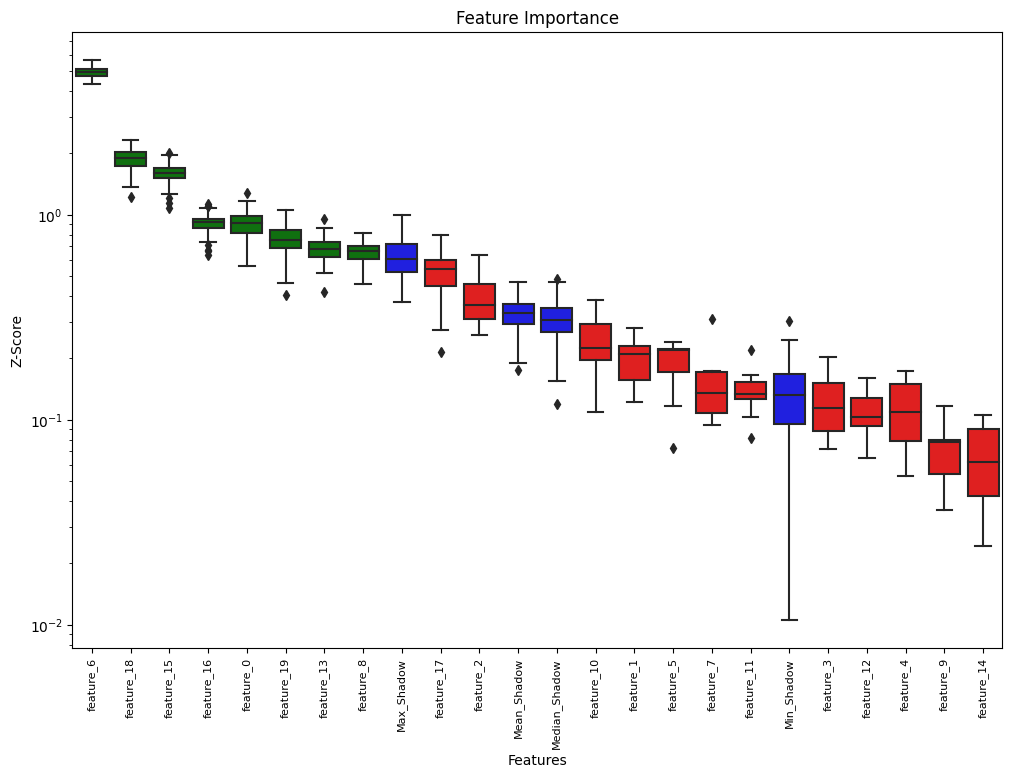

In [ ]:
Feature_Selector.plot(which_features='all')

In [ ]:
Feature_Selector.accepted

['feature_0',
 'feature_8',
 'feature_13',
 'feature_15',
 'feature_16',
 'feature_6',
 'feature_19',
 'feature_18']

In [ ]:
Feature_Selector.tentative

[]

In [ ]:
selected_features = Feature_Selector.accepted + Feature_Selector.tentative

In [ ]:
selected_features

['feature_6', 'feature_16', 'feature_18', 'feature_15', 'feature_0']

In [ ]:
model = LGBMClassifier(max_depth=5, n_estimators=500)

In [ ]:
X = pd.DataFrame(data=X, columns=[f'feature_{i}' for i in np.arange(X.shape[1])], index=np.arange(500))

In [ ]:
X = X[selected_features]

In [ ]:
X

,feature_6,feature_16,feature_18,feature_15,feature_0
0,1.244775,-1.507347,1.908254,-0.272394,1.064192
1,0.790185,-1.666672,1.850964,2.607526,-0.433390
2,1.517552,-0.691338,1.776817,-0.642691,0.593751
3,-1.101084,-1.350404,-0.288665,1.941699,0.124968
4,1.496271,-0.921016,1.836835,-0.826806,0.886330
...,...,...,...,...,...
495,1.677248,1.094325,0.849188,-3.147401,0.669455
496,1.350929,-2.041752,2.560444,2.364255,-0.117763
497,-0.517229,0.535492,-0.697226,0.588666,-0.655519
498,0.631710,-0.993230,0.805001,-2.436001,2.088449


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=43)

In [ ]:
scores = cross_val_score(model, X, y, cv=5)

In [ ]:
scores

array([0.84, 0.86, 0.84, 0.88, 0.85])

In [ ]:
scores.mean()

0.8539999999999999

In [ ]:
model.fit(X_train, y_train)

LGBMClassifier(max_depth=5, n_estimators=500)

In [ ]:
metrics.f1_score(model.predict(X_test), y_test)

0.9090909090909092

In [ ]:
selected_features

['feature_0',
 'feature_8',
 'feature_13',
 'feature_15',
 'feature_16',
 'feature_6',
 'feature_19',
 'feature_18']

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
import optuna  # pip install optuna
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

def objective(trial, X, y):
    param_grid = {}  # to be filled in later
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores = []
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = LGBMClassifier(objective="binary", **param_grid)
        model.fit(
            X_train,
            y_train,
        )
        preds = model.predict(X_test)
        scores.append(f1_score(preds, y_test))

    return np.mean(scores)

In [ ]:
import optuna
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

def objective(trial, X, y):
    param_grid = {
        "objective": 'binary',
        "n_estimators": trial.suggest_int("n_estimators", 10, 1500, 90),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.5),
        #"num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20), WRONG
        "max_depth": trial.suggest_int("max_depth", 3, 6),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 0, 10000, step=100),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.001, 1),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.001, 1),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        )
    }

    param_grid['num_leaves'] = 2**param_grid['max_depth']

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores = []

    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = LGBMClassifier(**param_grid)

        model.fit(
            X_train,
            y_train,
        )

        preds = model.predict(X_test)
        scores.append(f1_score(preds, y_test, average='weighted'))

    return np.mean(scores)

In [ ]:
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X[selected_features], y)
study.optimize(func, n_trials=50)

[I 2023-04-19 16:54:14,248] A new study created in memory with name: LGBM Classifier


[LightGBM] [Warning] lambda_l1 is set=0.29004467842975307, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.29004467842975307
[LightGBM] [Warning] min_data_in_leaf is set=2700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2700
[LightGBM] [Warning] min_gain_to_split is set=8.745404121264313, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.745404121264313
[LightGBM] [Warning] lambda_l2 is set=0.9301727206492075, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9301727206492075
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.29004467842975307, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.29004467842975307
[LightGBM] [Warning] min_data_in_leaf is set=2700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2700
[LightGBM] [Warning] min

[I 2023-04-19 16:54:15,352] Trial 0 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 1000, 'learning_rate': 0.42348314259266207, 'max_depth': 3, 'min_data_in_leaf': 2700, 'lambda_l1': 0.29004467842975307, 'lambda_l2': 0.9301727206492075, 'min_gain_to_split': 8.745404121264313, 'bagging_fraction': 0.30000000000000004}. Best is trial 0 with value: 0.6701986754966887.


0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.8555883342485552, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8555883342485552
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] min_gain_to_split is set=0.7830226317779487, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.7830226317779487
[LightGBM] [Warning] lambda_l2 is set=0.768609665672991, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.768609665672991
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.8555883342485552, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8555883342485552
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM

[I 2023-04-19 16:54:15,798] Trial 1 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 190, 'learning_rate': 0.1194127832688128, 'max_depth': 5, 'min_data_in_leaf': 1700, 'lambda_l1': 0.8555883342485552, 'lambda_l2': 0.768609665672991, 'min_gain_to_split': 0.7830226317779487, 'bagging_fraction': 0.30000000000000004}. Best is trial 0 with value: 0.6701986754966887.


0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.8555883342485552, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8555883342485552
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] min_gain_to_split is set=0.7830226317779487, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.7830226317779487
[LightGBM] [Warning] lambda_l2 is set=0.768609665672991, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.768609665672991
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.8555883342485552, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8555883342485552
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM

[I 2023-04-19 16:54:16,276] Trial 2 finished with value: 0.8264055568704693 and parameters: {'n_estimators': 1360, 'learning_rate': 0.37146918275680846, 'max_depth': 4, 'min_data_in_leaf': 0, 'lambda_l1': 0.7468324780404152, 'lambda_l2': 0.04587509926606138, 'min_gain_to_split': 14.207342882337892, 'bagging_fraction': 0.9}. Best is trial 2 with value: 0.8264055568704693.
[I 2023-04-19 16:54:16,341] Trial 3 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 10, 'learning_rate': 0.4897081631588428, 'max_depth': 4, 'min_data_in_leaf': 1400, 'lambda_l1': 0.8818417317677141, 'lambda_l2': 0.7528725918624766, 'min_gain_to_split': 10.287409297570306, 'bagging_fraction': 0.4}. Best is trial 2 with value: 0.8264055568704693.
[I 2023-04-19 16:54:16,467] Trial 4 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 640, 'learning_rate': 0.005919942831923488, 'max_depth': 5, 'min_data_in_leaf': 1100, 'lambda_l1': 0.45282478220446987, 'lambda_l2': 0.588891890

0.8100570513462115
[LightGBM] [Warning] lambda_l1 is set=0.8818417317677141, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8818417317677141
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] min_gain_to_split is set=10.287409297570306, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.287409297570306
[LightGBM] [Warning] lambda_l2 is set=0.7528725918624766, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7528725918624766
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.8818417317677141, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8818417317677141
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] min_gain_to_split 

[I 2023-04-19 16:54:16,676] Trial 5 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 1360, 'learning_rate': 0.19154501313465527, 'max_depth': 3, 'min_data_in_leaf': 4200, 'lambda_l1': 0.6723698807921252, 'lambda_l2': 0.03942271835668397, 'min_gain_to_split': 10.54119393211291, 'bagging_fraction': 0.30000000000000004}. Best is trial 2 with value: 0.8264055568704693.


[LightGBM] [Warning] lambda_l1 is set=0.6723698807921252, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6723698807921252
[LightGBM] [Warning] min_data_in_leaf is set=4200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4200
[LightGBM] [Warning] min_gain_to_split is set=10.54119393211291, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.54119393211291
[LightGBM] [Warning] lambda_l2 is set=0.03942271835668397, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03942271835668397
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.6723698807921252, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6723698807921252
[LightGBM] [Warning] min_data_in_leaf is set=4200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4200
[LightGBM] [Warning] min_g

[I 2023-04-19 16:54:16,859] Trial 6 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 1090, 'learning_rate': 0.05502927471272848, 'max_depth': 5, 'min_data_in_leaf': 3400, 'lambda_l1': 0.0951664031889251, 'lambda_l2': 0.20093011796802768, 'min_gain_to_split': 10.13369297276728, 'bagging_fraction': 0.7}. Best is trial 2 with value: 0.8264055568704693.


[LightGBM] [Warning] lambda_l1 is set=0.0951664031889251, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0951664031889251
[LightGBM] [Warning] min_data_in_leaf is set=3400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3400
[LightGBM] [Warning] min_gain_to_split is set=10.13369297276728, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.13369297276728
[LightGBM] [Warning] lambda_l2 is set=0.20093011796802768, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20093011796802768
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.0951664031889251, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0951664031889251
[LightGBM] [Warning] min_data_in_leaf is set=3400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3400
[LightGBM] [Warning] min_gain_to_split is set=10.133692972

[I 2023-04-19 16:54:17,001] Trial 7 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 640, 'learning_rate': 0.04696775938677541, 'max_depth': 4, 'min_data_in_leaf': 4500, 'lambda_l1': 0.5440779877842656, 'lambda_l2': 0.06871607094012619, 'min_gain_to_split': 8.478927849531152, 'bagging_fraction': 0.5}. Best is trial 2 with value: 0.8264055568704693.


[LightGBM] [Warning] lambda_l1 is set=0.5440779877842656, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5440779877842656
[LightGBM] [Warning] min_data_in_leaf is set=4500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4500
[LightGBM] [Warning] min_gain_to_split is set=8.478927849531152, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.478927849531152
[LightGBM] [Warning] lambda_l2 is set=0.06871607094012619, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06871607094012619
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.5440779877842656, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5440779877842656
[LightGBM] [Warning] min_data_in_leaf is set=4500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4500
[LightGBM] [Warning] min_gain_to_split is set=8.4789278495

[I 2023-04-19 16:54:17,185] Trial 8 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 1000, 'learning_rate': 0.325234663248983, 'max_depth': 6, 'min_data_in_leaf': 2300, 'lambda_l1': 0.2605508329614818, 'lambda_l2': 0.38022096468864475, 'min_gain_to_split': 2.2119992410664935, 'bagging_fraction': 0.5}. Best is trial 2 with value: 0.8264055568704693.


0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.2605508329614818, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2605508329614818
[LightGBM] [Warning] min_data_in_leaf is set=2300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2300
[LightGBM] [Warning] min_gain_to_split is set=2.2119992410664935, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.2119992410664935
[LightGBM] [Warning] lambda_l2 is set=0.38022096468864475, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.38022096468864475
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.2605508329614818, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2605508329614818
[LightGBM] [Warning] min_data_in_leaf is set=2300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2300
[LightGBM] [Warning] min_gain_to_spli

[I 2023-04-19 16:54:17,336] Trial 9 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 550, 'learning_rate': 0.4664220775824604, 'max_depth': 5, 'min_data_in_leaf': 8100, 'lambda_l1': 0.4246711288242315, 'lambda_l2': 0.8568150171966337, 'min_gain_to_split': 11.705184740944043, 'bagging_fraction': 0.4}. Best is trial 2 with value: 0.8264055568704693.


0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.7414926379805341, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7414926379805341
[LightGBM] [Warning] min_data_in_leaf is set=7700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7700
[LightGBM] [Warning] min_gain_to_split is set=14.904594272161306, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.904594272161306
[LightGBM] [Warning] lambda_l2 is set=0.2947487397972878, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2947487397972878
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.7414926379805341, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7414926379805341
[LightGBM] [Warning] min_data_in_leaf is set=7700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7700
[LightGBM] [Warning] min_gain_to_split 

[I 2023-04-19 16:54:17,615] Trial 10 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 1270, 'learning_rate': 0.3359042095376915, 'max_depth': 6, 'min_data_in_leaf': 7700, 'lambda_l1': 0.7414926379805341, 'lambda_l2': 0.2947487397972878, 'min_gain_to_split': 14.904594272161306, 'bagging_fraction': 0.9}. Best is trial 2 with value: 0.8264055568704693.


0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.7414926379805341, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7414926379805341
[LightGBM] [Warning] min_data_in_leaf is set=7700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7700
[LightGBM] [Warning] min_gain_to_split is set=14.904594272161306, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.904594272161306
[LightGBM] [Warning] lambda_l2 is set=0.2947487397972878, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2947487397972878
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.7414926379805341, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7414926379805341
[LightGBM] [Warning] min_data_in_leaf is set=7700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7700
[LightGBM] [Warning] min_gain_to_split 

[I 2023-04-19 16:54:17,876] Trial 11 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 1450, 'learning_rate': 0.3926563295978269, 'max_depth': 3, 'min_data_in_leaf': 6100, 'lambda_l1': 0.9758202947218342, 'lambda_l2': 0.9740671451496183, 'min_gain_to_split': 14.721403069869877, 'bagging_fraction': 0.9}. Best is trial 2 with value: 0.8264055568704693.


0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.9758202947218342, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9758202947218342
[LightGBM] [Warning] min_data_in_leaf is set=6100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6100
[LightGBM] [Warning] min_gain_to_split is set=14.721403069869877, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.721403069869877
[LightGBM] [Warning] lambda_l2 is set=0.9740671451496183, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9740671451496183
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.9758202947218342, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9758202947218342
[LightGBM] [Warning] min_data_in_leaf is set=6100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6100
[LightGBM] [Warning] min_gain_to_split 

[I 2023-04-19 16:54:18,229] Trial 12 finished with value: 0.8322727254011879 and parameters: {'n_estimators': 1000, 'learning_rate': 0.3993943851263649, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 0.003423575393229128, 'lambda_l2': 0.5288239431067475, 'min_gain_to_split': 6.0145436454393035, 'bagging_fraction': 0.7}. Best is trial 12 with value: 0.8322727254011879.


0.780352564102564
[LightGBM] [Warning] lambda_l1 is set=0.003423575393229128, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003423575393229128
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_split is set=6.0145436454393035, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.0145436454393035
[LightGBM] [Warning] lambda_l2 is set=0.5288239431067475, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5288239431067475
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
0.8599999999999999
[LightGBM] [Warning] lambda_l1 is set=0.003423575393229128, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003423575393229128
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_spl

[I 2023-04-19 16:54:18,484] Trial 13 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 1180, 'learning_rate': 0.2838112671455497, 'max_depth': 4, 'min_data_in_leaf': 400, 'lambda_l1': 0.050031501469077144, 'lambda_l2': 0.533666324524562, 'min_gain_to_split': 5.712264185533589, 'bagging_fraction': 0.7}. Best is trial 12 with value: 0.8322727254011879.


[LightGBM] [Warning] lambda_l1 is set=0.050031501469077144, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.050031501469077144
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_gain_to_split is set=5.712264185533589, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.712264185533589
[LightGBM] [Warning] lambda_l2 is set=0.533666324524562, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.533666324524562
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.050031501469077144, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.050031501469077144
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_gain_to_split is set=5.7122641855

[I 2023-04-19 16:54:18,672] Trial 14 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 910, 'learning_rate': 0.4040404478528389, 'max_depth': 3, 'min_data_in_leaf': 9900, 'lambda_l1': 0.6644012678569792, 'lambda_l2': 0.38830178660745207, 'min_gain_to_split': 4.603552468898307, 'bagging_fraction': 0.7}. Best is trial 12 with value: 0.8322727254011879.


[LightGBM] [Warning] lambda_l1 is set=0.6644012678569792, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6644012678569792
[LightGBM] [Warning] min_data_in_leaf is set=9900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9900
[LightGBM] [Warning] min_gain_to_split is set=4.603552468898307, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.603552468898307
[LightGBM] [Warning] lambda_l2 is set=0.38830178660745207, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.38830178660745207
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.6644012678569792, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6644012678569792
[LightGBM] [Warning] min_data_in_leaf is set=9900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9900
[LightGBM] [Warning] min_gain_to_split is set=4.6035524688

[I 2023-04-19 16:54:18,973] Trial 15 finished with value: 0.8363732716917177 and parameters: {'n_estimators': 820, 'learning_rate': 0.33454332797460773, 'max_depth': 4, 'min_data_in_leaf': 100, 'lambda_l1': 0.01841116210196534, 'lambda_l2': 0.19190239223411432, 'min_gain_to_split': 3.6309133676291125, 'bagging_fraction': 0.8}. Best is trial 15 with value: 0.8363732716917177.
[I 2023-04-19 16:54:19,135] Trial 16 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 370, 'learning_rate': 0.2317895359168867, 'max_depth': 3, 'min_data_in_leaf': 5800, 'lambda_l1': 0.045049354098117944, 'lambda_l2': 0.6095013730374509, 'min_gain_to_split': 4.017008460592715, 'bagging_fraction': 0.8}. Best is trial 15 with value: 0.8363732716917177.


[LightGBM] [Warning] lambda_l1 is set=0.045049354098117944, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.045049354098117944
[LightGBM] [Warning] min_data_in_leaf is set=5800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5800
[LightGBM] [Warning] min_gain_to_split is set=4.017008460592715, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.017008460592715
[LightGBM] [Warning] lambda_l2 is set=0.6095013730374509, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6095013730374509
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.045049354098117944, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.045049354098117944
[LightGBM] [Warning] min_data_in_leaf is set=5800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5800
[LightGBM] [Warning] min_gain_to_split is set=4.0170

[I 2023-04-19 16:54:19,377] Trial 17 finished with value: 0.8543626657902857 and parameters: {'n_estimators': 460, 'learning_rate': 0.2881851200853775, 'max_depth': 4, 'min_data_in_leaf': 0, 'lambda_l1': 0.14774973388026363, 'lambda_l2': 0.450290956593014, 'min_gain_to_split': 3.0079115219731367, 'bagging_fraction': 0.6000000000000001}. Best is trial 17 with value: 0.8543626657902857.


0.8507386192342478
[LightGBM] [Warning] lambda_l1 is set=0.14774973388026363, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14774973388026363
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=3.0079115219731367, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.0079115219731367
[LightGBM] [Warning] lambda_l2 is set=0.450290956593014, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.450290956593014
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
0.8602243589743588
[LightGBM] [Warning] lambda_l1 is set=0.14774973388026363, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14774973388026363
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning

[I 2023-04-19 16:54:19,524] Trial 18 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 370, 'learning_rate': 0.26644565525677233, 'max_depth': 4, 'min_data_in_leaf': 3200, 'lambda_l1': 0.1693224846316739, 'lambda_l2': 0.21441557337520556, 'min_gain_to_split': 0.1434411242903142, 'bagging_fraction': 0.6000000000000001}. Best is trial 17 with value: 0.8543626657902857.


0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.1693224846316739, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1693224846316739
[LightGBM] [Warning] min_data_in_leaf is set=3200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3200
[LightGBM] [Warning] min_gain_to_split is set=0.1434411242903142, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1434411242903142
[LightGBM] [Warning] lambda_l2 is set=0.21441557337520556, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21441557337520556
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.1693224846316739, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1693224846316739
[LightGBM] [Warning] min_data_in_leaf is set=3200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3200
[LightG

[I 2023-04-19 16:54:19,718] Trial 19 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 820, 'learning_rate': 0.31068561968387076, 'max_depth': 4, 'min_data_in_leaf': 1100, 'lambda_l1': 0.14672544250338487, 'lambda_l2': 0.4039634047579599, 'min_gain_to_split': 2.8756698875100657, 'bagging_fraction': 0.8}. Best is trial 17 with value: 0.8543626657902857.
[I 2023-04-19 16:54:19,881] Trial 20 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 460, 'learning_rate': 0.2183091254463606, 'max_depth': 5, 'min_data_in_leaf': 2400, 'lambda_l1': 0.2505885816385115, 'lambda_l2': 0.16812557159709363, 'min_gain_to_split': 2.028478529407373, 'bagging_fraction': 0.6000000000000001}. Best is trial 17 with value: 0.8543626657902857.


[LightGBM] [Warning] lambda_l1 is set=0.14672544250338487, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14672544250338487
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] min_gain_to_split is set=2.8756698875100657, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.8756698875100657
[LightGBM] [Warning] lambda_l2 is set=0.4039634047579599, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4039634047579599
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.2505885816385115, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2505885816385115
[LightGBM] [Warning] min_data_in_leaf is set=2400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2400
[LightGBM] [Warning] min_gain_to_split is set=2.02847852

[I 2023-04-19 16:54:20,247] Trial 21 finished with value: 0.8482860864069546 and parameters: {'n_estimators': 820, 'learning_rate': 0.3506072977808239, 'max_depth': 3, 'min_data_in_leaf': 0, 'lambda_l1': 0.018494909436910862, 'lambda_l2': 0.49596573428172996, 'min_gain_to_split': 5.026530223591372, 'bagging_fraction': 0.8}. Best is trial 17 with value: 0.8543626657902857.


0.8805797101449275
[LightGBM] [Warning] lambda_l1 is set=0.018494909436910862, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.018494909436910862
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=5.026530223591372, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.026530223591372
[LightGBM] [Warning] lambda_l2 is set=0.49596573428172996, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.49596573428172996
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.8302556390977444
[LightGBM] [Warning] lambda_l1 is set=0.13725502711987875, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13725502711987875
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] min_gain_to_split is

[I 2023-04-19 16:54:20,431] Trial 22 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 820, 'learning_rate': 0.3310633754454654, 'max_depth': 4, 'min_data_in_leaf': 600, 'lambda_l1': 0.13725502711987875, 'lambda_l2': 0.4390493818149719, 'min_gain_to_split': 4.0249913417518215, 'bagging_fraction': 0.8}. Best is trial 17 with value: 0.8543626657902857.


0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.13725502711987875, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13725502711987875
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] min_gain_to_split is set=4.0249913417518215, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.0249913417518215
[LightGBM] [Warning] lambda_l2 is set=0.4390493818149719, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4390493818149719
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.04094533896177682, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04094533896177682
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] min_gain_to_spli

[I 2023-04-19 16:54:20,617] Trial 23 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 730, 'learning_rate': 0.2923764101451561, 'max_depth': 4, 'min_data_in_leaf': 1900, 'lambda_l1': 0.04094533896177682, 'lambda_l2': 0.27185334294374364, 'min_gain_to_split': 4.761406005936233, 'bagging_fraction': 0.8}. Best is trial 17 with value: 0.8543626657902857.
[I 2023-04-19 16:54:20,748] Trial 24 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 190, 'learning_rate': 0.2662130712405446, 'max_depth': 3, 'min_data_in_leaf': 900, 'lambda_l1': 0.005180974581107146, 'lambda_l2': 0.4707353845779808, 'min_gain_to_split': 2.9550736844249186, 'bagging_fraction': 0.6000000000000001}. Best is trial 17 with value: 0.8543626657902857.


0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.005180974581107146, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005180974581107146
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] min_gain_to_split is set=2.9550736844249186, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.9550736844249186
[LightGBM] [Warning] lambda_l2 is set=0.4707353845779808, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4707353845779808
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.005180974581107146, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005180974581107146
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=900
[Ligh

[I 2023-04-19 16:54:21,025] Trial 25 finished with value: 0.8443166844114007 and parameters: {'n_estimators': 730, 'learning_rate': 0.3494179727502268, 'max_depth': 4, 'min_data_in_leaf': 100, 'lambda_l1': 0.21404239438287692, 'lambda_l2': 0.33122309819125195, 'min_gain_to_split': 1.3968839460229212, 'bagging_fraction': 0.2}. Best is trial 17 with value: 0.8543626657902857.


0.8400640256102441
[LightGBM] [Warning] lambda_l1 is set=0.21404239438287692, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21404239438287692
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_split is set=1.3968839460229212, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.3968839460229212
[LightGBM] [Warning] lambda_l2 is set=0.33122309819125195, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33122309819125195
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
0.8402564102564102
[LightGBM] [Warning] lambda_l1 is set=0.21404239438287692, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21404239438287692
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_spli

[I 2023-04-19 16:54:21,211] Trial 26 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 550, 'learning_rate': 0.36458613258034445, 'max_depth': 3, 'min_data_in_leaf': 1700, 'lambda_l1': 0.19326465058604214, 'lambda_l2': 0.34124142142569963, 'min_gain_to_split': 1.1640429558742587, 'bagging_fraction': 0.2}. Best is trial 17 with value: 0.8543626657902857.


[LightGBM] [Warning] lambda_l1 is set=0.19326465058604214, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19326465058604214
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] min_gain_to_split is set=1.1640429558742587, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.1640429558742587
[LightGBM] [Warning] lambda_l2 is set=0.34124142142569963, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.34124142142569963
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.19326465058604214, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19326465058604214
[LightGBM] [Warning] min_data_in_leaf is set=1700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1700
[LightGBM] [Warning] min_gain_to_split is set=1.1640

[I 2023-04-19 16:54:21,373] Trial 27 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 370, 'learning_rate': 0.36339455279895283, 'max_depth': 4, 'min_data_in_leaf': 3500, 'lambda_l1': 0.31217164595846464, 'lambda_l2': 0.47077844541814623, 'min_gain_to_split': 1.6028526393685607, 'bagging_fraction': 0.2}. Best is trial 17 with value: 0.8543626657902857.


0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.31217164595846464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.31217164595846464
[LightGBM] [Warning] min_data_in_leaf is set=3500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3500
[LightGBM] [Warning] min_gain_to_split is set=1.6028526393685607, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.6028526393685607
[LightGBM] [Warning] lambda_l2 is set=0.47077844541814623, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.47077844541814623
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.31217164595846464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.31217164595846464
[LightGBM] [Warning] min_data_in_leaf is set=3500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3500
[LightGBM] [Warning] min_gain_to_

[I 2023-04-19 16:54:21,555] Trial 28 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 640, 'learning_rate': 0.44238901927519014, 'max_depth': 5, 'min_data_in_leaf': 800, 'lambda_l1': 0.11101478263375367, 'lambda_l2': 0.3154239378712394, 'min_gain_to_split': 0.20410808250112678, 'bagging_fraction': 0.4}. Best is trial 17 with value: 0.8543626657902857.
[I 2023-04-19 16:54:21,692] Trial 29 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 190, 'learning_rate': 0.43368260035617834, 'max_depth': 3, 'min_data_in_leaf': 2800, 'lambda_l1': 0.33091563815401537, 'lambda_l2': 0.6186070615274817, 'min_gain_to_split': 2.8155117472914366, 'bagging_fraction': 0.6000000000000001}. Best is trial 17 with value: 0.8543626657902857.


0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.11101478263375367, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11101478263375367
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] min_gain_to_split is set=0.20410808250112678, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.20410808250112678
[LightGBM] [Warning] lambda_l2 is set=0.3154239378712394, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3154239378712394
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.33091563815401537, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.33091563815401537
[LightGBM] [Warning] min_data_in_leaf is set=2800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2800
[LightGBM] [Warning] min_gain_to_sp

[I 2023-04-19 16:54:21,887] Trial 30 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 730, 'learning_rate': 0.30416031436287, 'max_depth': 3, 'min_data_in_leaf': 5500, 'lambda_l1': 0.21850378415210625, 'lambda_l2': 0.44584944741466914, 'min_gain_to_split': 1.4254924950339123, 'bagging_fraction': 0.2}. Best is trial 17 with value: 0.8543626657902857.


[LightGBM] [Warning] lambda_l1 is set=0.21850378415210625, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21850378415210625
[LightGBM] [Warning] min_data_in_leaf is set=5500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5500
[LightGBM] [Warning] min_gain_to_split is set=1.4254924950339123, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.4254924950339123
[LightGBM] [Warning] lambda_l2 is set=0.44584944741466914, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.44584944741466914
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.21850378415210625, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21850378415210625
[LightGBM] [Warning] min_data_in_leaf is set=5500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5500
[LightGBM] [Warning] min_gain_to_split is set=1.4254

[I 2023-04-19 16:54:22,285] Trial 31 finished with value: 0.856325533102496 and parameters: {'n_estimators': 910, 'learning_rate': 0.3452321594586532, 'max_depth': 4, 'min_data_in_leaf': 0, 'lambda_l1': 0.0897368546100393, 'lambda_l2': 0.3524475941548792, 'min_gain_to_split': 3.541270604309898, 'bagging_fraction': 0.8}. Best is trial 31 with value: 0.856325533102496.


0.8805797101449275
[LightGBM] [Warning] lambda_l1 is set=0.0897368546100393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0897368546100393
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=3.541270604309898, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.541270604309898
[LightGBM] [Warning] lambda_l2 is set=0.3524475941548792, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3524475941548792
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.8401282051282053
[LightGBM] [Warning] lambda_l1 is set=0.11002089797059136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11002089797059136
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=5.163

[I 2023-04-19 16:54:22,639] Trial 32 finished with value: 0.8503544966121812 and parameters: {'n_estimators': 910, 'learning_rate': 0.3516964116853495, 'max_depth': 4, 'min_data_in_leaf': 0, 'lambda_l1': 0.11002089797059136, 'lambda_l2': 0.3989263894883081, 'min_gain_to_split': 5.16381931010297, 'bagging_fraction': 0.7}. Best is trial 31 with value: 0.856325533102496.


0.840578081091931
[LightGBM] [Warning] lambda_l1 is set=0.11002089797059136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11002089797059136
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=5.16381931010297, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.16381931010297
[LightGBM] [Warning] lambda_l2 is set=0.3989263894883081, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3989263894883081
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
0.8701171053948553
[LightGBM] [Warning] lambda_l1 is set=0.11002089797059136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11002089797059136
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=5.1638

[I 2023-04-19 16:54:22,858] Trial 33 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 910, 'learning_rate': 0.37580481927072373, 'max_depth': 4, 'min_data_in_leaf': 1800, 'lambda_l1': 0.10372209639416241, 'lambda_l2': 0.5195330089698944, 'min_gain_to_split': 5.171576448239097, 'bagging_fraction': 0.7}. Best is trial 31 with value: 0.856325533102496.


[LightGBM] [Warning] lambda_l1 is set=0.10372209639416241, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10372209639416241
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] min_gain_to_split is set=5.171576448239097, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.171576448239097
[LightGBM] [Warning] lambda_l2 is set=0.5195330089698944, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5195330089698944
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.10372209639416241, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10372209639416241
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] min_gain_to_split is set=5.17157644

[I 2023-04-19 16:54:23,133] Trial 34 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 1090, 'learning_rate': 0.2981173153844224, 'max_depth': 4, 'min_data_in_leaf': 700, 'lambda_l1': 0.09126321921241308, 'lambda_l2': 0.4118846223498311, 'min_gain_to_split': 6.92890376748013, 'bagging_fraction': 0.9}. Best is trial 31 with value: 0.856325533102496.


0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.16402799185090103, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16402799185090103
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] min_gain_to_split is set=5.378459584355322, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.378459584355322
[LightGBM] [Warning] lambda_l2 is set=0.3637437180089415, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3637437180089415
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.16402799185090103, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16402799185090103
[LightGBM] [Warning] min_data_in_leaf is set=1300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1300
[LightGBM] [Warning] min_gain_to_spli

[I 2023-04-19 16:54:23,348] Trial 35 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 910, 'learning_rate': 0.40911845200648056, 'max_depth': 5, 'min_data_in_leaf': 1300, 'lambda_l1': 0.16402799185090103, 'lambda_l2': 0.3637437180089415, 'min_gain_to_split': 5.378459584355322, 'bagging_fraction': 0.7}. Best is trial 31 with value: 0.856325533102496.


0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.07489354431214781, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07489354431214781
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=6.294744424971714, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.294744424971714
[LightGBM] [Warning] lambda_l2 is set=0.6607777034459628, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6607777034459628
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.8400640256102441
[LightGBM] [Warning] lambda_l1 is set=0.07489354431214781, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07489354431214781
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=6.2

[I 2023-04-19 16:54:23,749] Trial 36 finished with value: 0.8463009290480208 and parameters: {'n_estimators': 1090, 'learning_rate': 0.37154104447233866, 'max_depth': 4, 'min_data_in_leaf': 0, 'lambda_l1': 0.07489354431214781, 'lambda_l2': 0.6607777034459628, 'min_gain_to_split': 6.294744424971714, 'bagging_fraction': 0.8}. Best is trial 31 with value: 0.856325533102496.


0.8599999999999999
[LightGBM] [Warning] lambda_l1 is set=0.07489354431214781, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07489354431214781
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=6.294744424971714, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.294744424971714
[LightGBM] [Warning] lambda_l2 is set=0.6607777034459628, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6607777034459628
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.8708256880733944
[LightGBM] [Warning] lambda_l1 is set=0.07489354431214781, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07489354431214781
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=6.2

[I 2023-04-19 16:54:23,920] Trial 37 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 550, 'learning_rate': 0.247877260284371, 'max_depth': 5, 'min_data_in_leaf': 1400, 'lambda_l1': 0.13906431126572102, 'lambda_l2': 0.4837582664599648, 'min_gain_to_split': 7.164522338612288, 'bagging_fraction': 0.6000000000000001}. Best is trial 31 with value: 0.856325533102496.


0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.13906431126572102, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13906431126572102
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] min_gain_to_split is set=7.164522338612288, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.164522338612288
[LightGBM] [Warning] lambda_l2 is set=0.4837582664599648, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4837582664599648
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.13906431126572102, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13906431126572102
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1400
[LightG

[I 2023-04-19 16:54:24,044] Trial 38 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 100, 'learning_rate': 0.20022651793617322, 'max_depth': 3, 'min_data_in_leaf': 600, 'lambda_l1': 0.07723761925763958, 'lambda_l2': 0.5697959099646877, 'min_gain_to_split': 4.531766217066108, 'bagging_fraction': 0.9}. Best is trial 31 with value: 0.856325533102496.


[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] min_gain_to_split is set=4.531766217066108, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.531766217066108
[LightGBM] [Warning] lambda_l2 is set=0.5697959099646877, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5697959099646877
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.2753787734236731, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2753787734236731
[LightGBM] [Warning] min_data_in_leaf is set=2200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2200
[LightGBM] [Warning] min_gain_to_split is set=3.8261265304068637, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.8261265304068637
[LightGBM] [Warning] lambda_l2 is set=0.4

[I 2023-04-19 16:54:24,280] Trial 39 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 1000, 'learning_rate': 0.49641280585698033, 'max_depth': 4, 'min_data_in_leaf': 2200, 'lambda_l1': 0.2753787734236731, 'lambda_l2': 0.4227165599738158, 'min_gain_to_split': 3.8261265304068637, 'bagging_fraction': 0.7}. Best is trial 31 with value: 0.856325533102496.


0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.19362299831610677, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19362299831610677
[LightGBM] [Warning] min_data_in_leaf is set=6800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6800
[LightGBM] [Warning] min_gain_to_split is set=7.96324687127697, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.96324687127697
[LightGBM] [Warning] lambda_l2 is set=0.6766511926071854, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6766511926071854
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.19362299831610677, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19362299831610677
[LightGBM] [Warning] min_data_in_leaf is set=6800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6800
[LightGBM] [Warning] min_gain_to_split 

[I 2023-04-19 16:54:24,506] Trial 40 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 1180, 'learning_rate': 0.31269095866990587, 'max_depth': 5, 'min_data_in_leaf': 6800, 'lambda_l1': 0.19362299831610677, 'lambda_l2': 0.6766511926071854, 'min_gain_to_split': 7.96324687127697, 'bagging_fraction': 0.5}. Best is trial 31 with value: 0.856325533102496.


0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.07020839325906705, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07020839325906705
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_split is set=5.902231153388094, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.902231153388094
[LightGBM] [Warning] lambda_l2 is set=0.6622872549729193, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6622872549729193
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.8202884615384616
[LightGBM] [Warning] lambda_l1 is set=0.07020839325906705, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07020839325906705
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_split is

[I 2023-04-19 16:54:24,884] Trial 41 finished with value: 0.8323061798597384 and parameters: {'n_estimators': 1090, 'learning_rate': 0.3502210901411179, 'max_depth': 4, 'min_data_in_leaf': 100, 'lambda_l1': 0.07020839325906705, 'lambda_l2': 0.6622872549729193, 'min_gain_to_split': 5.902231153388094, 'bagging_fraction': 0.8}. Best is trial 31 with value: 0.856325533102496.


0.8500150015001501
[LightGBM] [Warning] lambda_l1 is set=0.07020839325906705, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07020839325906705
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_split is set=5.902231153388094, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.902231153388094
[LightGBM] [Warning] lambda_l2 is set=0.6622872549729193, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6622872549729193
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.8704572404783437
[LightGBM] [Warning] lambda_l1 is set=0.07020839325906705, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07020839325906705
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_split is

[I 2023-04-19 16:54:25,115] Trial 42 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 1180, 'learning_rate': 0.3926367088547187, 'max_depth': 4, 'min_data_in_leaf': 1100, 'lambda_l1': 0.10302715743520596, 'lambda_l2': 0.4934888046772793, 'min_gain_to_split': 6.289778247568283, 'bagging_fraction': 0.8}. Best is trial 31 with value: 0.856325533102496.


0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.10302715743520596, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10302715743520596
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] min_gain_to_split is set=6.289778247568283, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.289778247568283
[LightGBM] [Warning] lambda_l2 is set=0.4934888046772793, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4934888046772793
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.10302715743520596, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10302715743520596
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] min_gain_to_spli

[I 2023-04-19 16:54:25,339] Trial 43 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 910, 'learning_rate': 0.3803319429453024, 'max_depth': 4, 'min_data_in_leaf': 500, 'lambda_l1': 0.062381582788869946, 'lambda_l2': 0.5635424814804137, 'min_gain_to_split': 6.626166225209471, 'bagging_fraction': 0.9}. Best is trial 31 with value: 0.856325533102496.


0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.062381582788869946, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.062381582788869946
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_gain_to_split is set=6.626166225209471, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.626166225209471
[LightGBM] [Warning] lambda_l2 is set=0.5635424814804137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5635424814804137
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.062381582788869946, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.062381582788869946
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_gain_to_spli

[I 2023-04-19 16:54:25,752] Trial 44 finished with value: 0.8404135212131232 and parameters: {'n_estimators': 1270, 'learning_rate': 0.35490196106910965, 'max_depth': 4, 'min_data_in_leaf': 100, 'lambda_l1': 0.1385165706842777, 'lambda_l2': 0.7593012410345328, 'min_gain_to_split': 5.15715920133587, 'bagging_fraction': 0.7}. Best is trial 31 with value: 0.856325533102496.


0.8903868957893678
[LightGBM] [Warning] lambda_l1 is set=0.1385165706842777, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1385165706842777
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_split is set=5.15715920133587, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.15715920133587
[LightGBM] [Warning] lambda_l2 is set=0.7593012410345328, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7593012410345328
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
0.8009661835748793
[LightGBM] [Warning] lambda_l1 is set=0.0022466957209573007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0022466957209573007
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] min_gain_to_split 

[I 2023-04-19 16:54:28,759] Trial 45 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 820, 'learning_rate': 0.41982742797424943, 'max_depth': 4, 'min_data_in_leaf': 1600, 'lambda_l1': 0.0022466957209573007, 'lambda_l2': 0.5165709502167537, 'min_gain_to_split': 7.553070534102327, 'bagging_fraction': 0.8}. Best is trial 31 with value: 0.856325533102496.


0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.0022466957209573007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0022466957209573007
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] min_gain_to_split is set=7.553070534102327, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.553070534102327
[LightGBM] [Warning] lambda_l2 is set=0.5165709502167537, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5165709502167537
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.0022466957209573007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0022466957209573007
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] min_gain

[I 2023-04-19 16:54:28,991] Trial 46 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 1090, 'learning_rate': 0.32535984886128044, 'max_depth': 6, 'min_data_in_leaf': 4200, 'lambda_l1': 0.3563860863487158, 'lambda_l2': 0.38156883113458834, 'min_gain_to_split': 3.371003951739505, 'bagging_fraction': 0.8}. Best is trial 31 with value: 0.856325533102496.


0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.3563860863487158, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3563860863487158
[LightGBM] [Warning] min_data_in_leaf is set=4200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4200
[LightGBM] [Warning] min_gain_to_split is set=3.371003951739505, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.371003951739505
[LightGBM] [Warning] lambda_l2 is set=0.38156883113458834, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.38156883113458834
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.6754966887417219
[LightGBM] [Warning] lambda_l1 is set=0.3563860863487158, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3563860863487158
[LightGBM] [Warning] min_data_in_leaf is set=4200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4200
[LightGBM] [Warning] min_gain_to_split 

[I 2023-04-19 16:54:29,368] Trial 47 finished with value: 0.8383598219559654 and parameters: {'n_estimators': 1000, 'learning_rate': 0.45380619418487383, 'max_depth': 3, 'min_data_in_leaf': 0, 'lambda_l1': 0.23503644510545402, 'lambda_l2': 0.45390660807114086, 'min_gain_to_split': 6.321059281491156, 'bagging_fraction': 0.7}. Best is trial 31 with value: 0.856325533102496.


0.8200720288115246
[LightGBM] [Warning] lambda_l1 is set=0.23503644510545402, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.23503644510545402
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=6.321059281491156, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.321059281491156
[LightGBM] [Warning] lambda_l2 is set=0.45390660807114086, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.45390660807114086
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
0.8500150015001501
[LightGBM] [Warning] lambda_l1 is set=0.23503644510545402, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.23503644510545402
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=6

[I 2023-04-19 16:54:29,560] Trial 48 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 640, 'learning_rate': 0.3800092484673541, 'max_depth': 5, 'min_data_in_leaf': 1100, 'lambda_l1': 0.044642093778903255, 'lambda_l2': 0.8071623561251826, 'min_gain_to_split': 5.686518569740693, 'bagging_fraction': 0.9}. Best is trial 31 with value: 0.856325533102496.


[LightGBM] [Warning] lambda_l1 is set=0.044642093778903255, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.044642093778903255
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] min_gain_to_split is set=5.686518569740693, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.686518569740693
[LightGBM] [Warning] lambda_l2 is set=0.8071623561251826, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8071623561251826
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.044642093778903255, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.044642093778903255
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] min_gain_to_split is set=5.6865

[I 2023-04-19 16:54:29,789] Trial 49 finished with value: 0.6701986754966887 and parameters: {'n_estimators': 1000, 'learning_rate': 0.2813149233463683, 'max_depth': 4, 'min_data_in_leaf': 9600, 'lambda_l1': 0.18947205234364023, 'lambda_l2': 0.5454589810298848, 'min_gain_to_split': 4.422653261625701, 'bagging_fraction': 0.5}. Best is trial 31 with value: 0.856325533102496.


0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.18947205234364023, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18947205234364023
[LightGBM] [Warning] min_data_in_leaf is set=9600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9600
[LightGBM] [Warning] min_gain_to_split is set=4.422653261625701, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.422653261625701
[LightGBM] [Warning] lambda_l2 is set=0.5454589810298848, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5454589810298848
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
0.6666666666666665
[LightGBM] [Warning] lambda_l1 is set=0.18947205234364023, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18947205234364023
[LightGBM] [Warning] min_data_in_leaf is set=9600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9600
[LightGBM] [Warning] min_gain_to_spli

In [ ]:
best_trial = study.best_trial

In [ ]:
best_trial.values

[0.856325533102496]

In [ ]:
best_trial.params

{'n_estimators': 910,
 'learning_rate': 0.3452321594586532,
 'max_depth': 4,
 'min_data_in_leaf': 0,
 'lambda_l1': 0.0897368546100393,
 'lambda_l2': 0.3524475941548792,
 'min_gain_to_split': 3.541270604309898,
 'bagging_fraction': 0.8}

In [ ]:
best_params = best_trial.params

In [ ]:
model = LGBMClassifier(**best_params)

In [ ]:
model

LGBMClassifier(bagging_fraction=0.8, lambda_l1=0.0897368546100393,
               lambda_l2=0.3524475941548792, learning_rate=0.3452321594586532,
               max_depth=4, min_data_in_leaf=0,
               min_gain_to_split=3.541270604309898, n_estimators=910)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_features],
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=43)

In [ ]:
scores = cross_val_score(model, X, y, cv=5)

[LightGBM] [Warning] lambda_l1 is set=0.0897368546100393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0897368546100393
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=3.541270604309898, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.541270604309898
[LightGBM] [Warning] lambda_l2 is set=0.3524475941548792, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3524475941548792
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.0897368546100393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0897368546100393
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=3.541270604309898, min_split_gain=0.0 will be

In [ ]:
scores

array([0.89, 0.85, 0.81, 0.85, 0.86])

In [ ]:
import optuna
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

def objective(trial, X, y):
    param_grid = {
            "verbosity": -1,
            "n_jobs": 2,
            "bagging_freq": trial.suggest_int("bagging_freq", 1, 9),
            "num_iterations": trial.suggest_int("num_iterations", 50, 2500),  # n_trees
            "lambda_l1": trial.suggest_loguniform("lambda_l1", 1e-8, 10.0),
            "lambda_l2": trial.suggest_loguniform("lambda_l2", 1e-8, 10.0),
            "feature_fraction": trial.suggest_uniform("feature_fraction", 0.01, 1.0),
            "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.01, 1.0),
            "min_child_samples": trial.suggest_int("min_child_samples", 5, 5000),
            "max_depth": trial.suggest_int("max_depth", 3, 8),
            "learning_rate": trial.suggest_uniform("learning_rate", 0.001, 0.3),
        }

    param_grid['num_leaves'] = 2**param_grid['max_depth']

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores = []

    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = LGBMClassifier(**param_grid)

        model.fit(
            X_train,
            y_train,
        )

        preds = model.predict(X_test)
        scores.append(f1_score(preds, y_test, average='weighted'))

    return np.mean(scores)

In [ ]:
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X[selected_features], y)
study.optimize(func, n_trials=50)

[I 2023-04-19 16:56:54,755] A new study created in memory with name: LGBM Classifier


[LightGBM] [Warning] bagging_fraction is set=0.4704616798676511, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4704616798676511
[LightGBM] [Warning] lambda_l2 is set=6.702705670323744, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.702705670323744
[LightGBM] [Warning] lambda_l1 is set=0.00012419809683618583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012419809683618583
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7841539609082542, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7841539609082542
[LightGBM] [Warning] bagging_fraction is set=0.4704616798676511, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4704616798676511
[LightGBM] [Warning] lambda_l2 is set=6.702705670323744, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.702705670323744
[LightGBM] [Warning] lambda_l1 is set=0

[I 2023-04-19 16:56:55,080] Trial 0 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 4, 'num_iterations': 1568, 'lambda_l1': 0.00012419809683618583, 'lambda_l2': 6.702705670323744, 'feature_fraction': 0.7841539609082542, 'bagging_fraction': 0.4704616798676511, 'min_child_samples': 235, 'max_depth': 8, 'learning_rate': 0.1606231622486307}. Best is trial 0 with value: 0.6701986754966887.
[I 2023-04-19 16:56:55,197] Trial 1 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 3, 'num_iterations': 460, 'lambda_l1': 0.768488263683602, 'lambda_l2': 9.855305655545008, 'feature_fraction': 0.7256010035005224, 'bagging_fraction': 0.7922964134824224, 'min_child_samples': 4626, 'max_depth': 4, 'learning_rate': 0.22313702395183185}. Best is trial 0 with value: 0.6701986754966887.


[LightGBM] [Warning] bagging_fraction is set=0.4704616798676511, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4704616798676511
[LightGBM] [Warning] lambda_l2 is set=6.702705670323744, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.702705670323744
[LightGBM] [Warning] lambda_l1 is set=0.00012419809683618583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012419809683618583
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7841539609082542, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7841539609082542
[LightGBM] [Warning] bagging_fraction is set=0.7922964134824224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7922964134824224
[LightGBM] [Warning] lambda_l2 is set=9.855305655545008, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.855305655545008
[LightGBM] [Warning] lambda_l1 is set=0

[I 2023-04-19 16:56:55,494] Trial 2 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 9, 'num_iterations': 1190, 'lambda_l1': 2.8876351546129227e-08, 'lambda_l2': 7.358900471508407e-07, 'feature_fraction': 0.4395352653382734, 'bagging_fraction': 0.638368223114891, 'min_child_samples': 325, 'max_depth': 4, 'learning_rate': 0.019176309950790168}. Best is trial 0 with value: 0.6701986754966887.


[LightGBM] [Warning] bagging_fraction is set=0.7945732371175048, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7945732371175048
[LightGBM] [Warning] lambda_l2 is set=2.8049931119345235, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8049931119345235
[LightGBM] [Warning] lambda_l1 is set=0.7805382160386259, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7805382160386259
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.02922490974847721, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.02922490974847721
[LightGBM] [Warning] bagging_fraction is set=0.7945732371175048, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7945732371175048
[LightGBM] [Warning] lambda_l2 is set=2.8049931119345235, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8049931119345235
[LightGBM] [Warning] lambda_l1 is set=0.7

[I 2023-04-19 16:56:55,808] Trial 3 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 2, 'num_iterations': 1538, 'lambda_l1': 0.7805382160386259, 'lambda_l2': 2.8049931119345235, 'feature_fraction': 0.02922490974847721, 'bagging_fraction': 0.7945732371175048, 'min_child_samples': 2119, 'max_depth': 6, 'learning_rate': 0.28096750328873915}. Best is trial 0 with value: 0.6701986754966887.


[LightGBM] [Warning] bagging_fraction is set=0.7945732371175048, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7945732371175048
[LightGBM] [Warning] lambda_l2 is set=2.8049931119345235, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8049931119345235
[LightGBM] [Warning] lambda_l1 is set=0.7805382160386259, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7805382160386259
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.02922490974847721, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.02922490974847721
[LightGBM] [Warning] bagging_fraction is set=0.33907590651211217, subsample=1.0 will be ignored. Current value: bagging_fraction=0.33907590651211217
[LightGBM] [Warning] lambda_l2 is set=0.00021202008031036398, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00021202008031036398
[LightGBM] [Warning] lambda_l1 

[I 2023-04-19 16:56:55,975] Trial 4 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 8, 'num_iterations': 551, 'lambda_l1': 0.06771577450412321, 'lambda_l2': 0.00021202008031036398, 'feature_fraction': 0.2876952434402446, 'bagging_fraction': 0.33907590651211217, 'min_child_samples': 1104, 'max_depth': 8, 'learning_rate': 0.1707261595308276}. Best is trial 0 with value: 0.6701986754966887.
[I 2023-04-19 16:56:56,057] Trial 5 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 9, 'num_iterations': 142, 'lambda_l1': 9.219597017239872, 'lambda_l2': 1.9437610285392727e-08, 'feature_fraction': 0.4776939996512558, 'bagging_fraction': 0.6486469140267647, 'min_child_samples': 468, 'max_depth': 6, 'learning_rate': 0.2412027178745186}. Best is trial 0 with value: 0.6701986754966887.



[LightGBM] [Warning] bagging_fraction is set=0.6486469140267647, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6486469140267647
[LightGBM] [Warning] lambda_l2 is set=1.9437610285392727e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9437610285392727e-08
[LightGBM] [Warning] lambda_l1 is set=9.219597017239872, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.219597017239872
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.4776939996512558, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4776939996512558
[LightGBM] [Warning] bagging_fraction is set=0.6486469140267647, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6486469140267647
[LightGBM] [Warning] lambda_l2 is set=1.9437610285392727e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9437610285392727e-08
[LightGBM] [Warning] lambda_

[I 2023-04-19 16:56:56,202] Trial 6 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 5, 'num_iterations': 602, 'lambda_l1': 0.013334162009237715, 'lambda_l2': 0.09619490470371984, 'feature_fraction': 0.14311981535983265, 'bagging_fraction': 0.04147723964022553, 'min_child_samples': 3946, 'max_depth': 4, 'learning_rate': 0.07633994102403177}. Best is trial 0 with value: 0.6701986754966887.


[LightGBM] [Warning] bagging_fraction is set=0.04147723964022553, subsample=1.0 will be ignored. Current value: bagging_fraction=0.04147723964022553
[LightGBM] [Warning] lambda_l2 is set=0.09619490470371984, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09619490470371984
[LightGBM] [Warning] lambda_l1 is set=0.013334162009237715, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013334162009237715
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.14311981535983265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14311981535983265
[LightGBM] [Warning] bagging_fraction is set=0.04147723964022553, subsample=1.0 will be ignored. Current value: bagging_fraction=0.04147723964022553
[LightGBM] [Warning] lambda_l2 is set=0.09619490470371984, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09619490470371984
[LightGBM] [Warning] lambda_l

[I 2023-04-19 16:56:56,459] Trial 7 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 7, 'num_iterations': 894, 'lambda_l1': 0.0002318067960232598, 'lambda_l2': 0.036359008246779116, 'feature_fraction': 0.572293965976375, 'bagging_fraction': 0.40269399133865313, 'min_child_samples': 1061, 'max_depth': 5, 'learning_rate': 0.22467698349228304}. Best is trial 0 with value: 0.6701986754966887.


[LightGBM] [Warning] bagging_fraction is set=0.40269399133865313, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40269399133865313
[LightGBM] [Warning] lambda_l2 is set=0.036359008246779116, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.036359008246779116
[LightGBM] [Warning] lambda_l1 is set=0.0002318067960232598, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002318067960232598
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.572293965976375, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.572293965976375
[LightGBM] [Warning] bagging_fraction is set=0.40269399133865313, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40269399133865313
[LightGBM] [Warning] lambda_l2 is set=0.036359008246779116, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.036359008246779116
[LightGBM] [Warning] lambda

[I 2023-04-19 16:56:56,754] Trial 8 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 5, 'num_iterations': 1324, 'lambda_l1': 0.0004061523833093355, 'lambda_l2': 1.8120735784696136e-07, 'feature_fraction': 0.3720444073893519, 'bagging_fraction': 0.5235467056462209, 'min_child_samples': 2127, 'max_depth': 8, 'learning_rate': 0.12532619663526065}. Best is trial 0 with value: 0.6701986754966887.


[LightGBM] [Warning] bagging_fraction is set=0.5235467056462209, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5235467056462209
[LightGBM] [Warning] lambda_l2 is set=1.8120735784696136e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8120735784696136e-07
[LightGBM] [Warning] lambda_l1 is set=0.0004061523833093355, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004061523833093355
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.3720444073893519, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3720444073893519
[LightGBM] [Warning] bagging_fraction is set=0.5235467056462209, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5235467056462209
[LightGBM] [Warning] lambda_l2 is set=1.8120735784696136e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8120735784696136e-07
[LightGBM] [Warning] 

[I 2023-04-19 16:57:00,057] Trial 9 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 9, 'num_iterations': 1583, 'lambda_l1': 0.0043236904773644265, 'lambda_l2': 8.147122362104633e-05, 'feature_fraction': 0.3365714906831639, 'bagging_fraction': 0.23047571664430336, 'min_child_samples': 1372, 'max_depth': 4, 'learning_rate': 0.03361600284518572}. Best is trial 0 with value: 0.6701986754966887.


[LightGBM] [Warning] bagging_fraction is set=0.23047571664430336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.23047571664430336
[LightGBM] [Warning] lambda_l2 is set=8.147122362104633e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.147122362104633e-05
[LightGBM] [Warning] lambda_l1 is set=0.0043236904773644265, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0043236904773644265
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.3365714906831639, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3365714906831639
[LightGBM] [Warning] bagging_fraction is set=0.9542590558800994, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9542590558800994
[LightGBM] [Warning] lambda_l2 is set=0.025165873782758797, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.025165873782758797
[LightGBM] [Warning] lamb

[I 2023-04-19 16:57:00,494] Trial 10 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 1, 'num_iterations': 2402, 'lambda_l1': 6.618559951836496e-06, 'lambda_l2': 0.025165873782758797, 'feature_fraction': 0.9554655109256862, 'bagging_fraction': 0.9542590558800994, 'min_child_samples': 3307, 'max_depth': 7, 'learning_rate': 0.14802985468289503}. Best is trial 0 with value: 0.6701986754966887.


[LightGBM] [Warning] bagging_fraction is set=0.9542590558800994, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9542590558800994
[LightGBM] [Warning] lambda_l2 is set=0.025165873782758797, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.025165873782758797
[LightGBM] [Warning] lambda_l1 is set=6.618559951836496e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.618559951836496e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9554655109256862, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9554655109256862
[LightGBM] [Warning] bagging_fraction is set=0.9425107977631164, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9425107977631164
[LightGBM] [Warning] lambda_l2 is set=6.254716655928693, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.254716655928693
[LightGBM] [Warning] lambda_l1 is s

[I 2023-04-19 16:57:00,907] Trial 11 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 3, 'num_iterations': 2061, 'lambda_l1': 6.5817340748156905, 'lambda_l2': 6.254716655928693, 'feature_fraction': 0.7421583301634158, 'bagging_fraction': 0.9425107977631164, 'min_child_samples': 4811, 'max_depth': 3, 'learning_rate': 0.19347787654605472}. Best is trial 0 with value: 0.6701986754966887.


[LightGBM] [Warning] bagging_fraction is set=0.9425107977631164, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9425107977631164
[LightGBM] [Warning] lambda_l2 is set=6.254716655928693, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.254716655928693
[LightGBM] [Warning] lambda_l1 is set=6.5817340748156905, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.5817340748156905
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7421583301634158, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7421583301634158
[LightGBM] [Warning] bagging_fraction is set=0.7524726312767998, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7524726312767998
[LightGBM] [Warning] lambda_l2 is set=6.7531154614111975, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.7531154614111975
[LightGBM] [Warning] lambda_l1 is set=0.07258

[I 2023-04-19 16:57:01,315] Trial 12 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 3, 'num_iterations': 1888, 'lambda_l1': 0.07258808673005572, 'lambda_l2': 6.7531154614111975, 'feature_fraction': 0.7532577885681317, 'bagging_fraction': 0.7524726312767998, 'min_child_samples': 4969, 'max_depth': 5, 'learning_rate': 0.2054367105326276}. Best is trial 0 with value: 0.6701986754966887.
[I 2023-04-19 16:57:01,437] Trial 13 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 4, 'num_iterations': 65, 'lambda_l1': 2.780558981953299e-05, 'lambda_l2': 0.2552450282652852, 'feature_fraction': 0.6423740054656457, 'bagging_fraction': 0.5025967729992524, 'min_child_samples': 3081, 'max_depth': 3, 'learning_rate': 0.12272941093487036}. Best is trial 0 with value: 0.6701986754966887.


[LightGBM] [Warning] bagging_fraction is set=0.5025967729992524, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5025967729992524
[LightGBM] [Warning] lambda_l2 is set=0.2552450282652852, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2552450282652852
[LightGBM] [Warning] lambda_l1 is set=2.780558981953299e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.780558981953299e-05
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6423740054656457, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6423740054656457
[LightGBM] [Warning] bagging_fraction is set=0.5025967729992524, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5025967729992524
[LightGBM] [Warning] lambda_l2 is set=0.2552450282652852, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2552450282652852
[LightGBM] [Warning] lambda_l1 is set

[I 2023-04-19 16:57:01,706] Trial 14 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 6, 'num_iterations': 867, 'lambda_l1': 0.3932317850313308, 'lambda_l2': 0.0020897617769798757, 'feature_fraction': 0.974265590171429, 'bagging_fraction': 0.8307826397246035, 'min_child_samples': 4089, 'max_depth': 7, 'learning_rate': 0.2997729484580199}. Best is trial 0 with value: 0.6701986754966887.


[LightGBM] [Warning] bagging_fraction is set=0.8307826397246035, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8307826397246035
[LightGBM] [Warning] lambda_l2 is set=0.0020897617769798757, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0020897617769798757
[LightGBM] [Warning] lambda_l1 is set=0.3932317850313308, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3932317850313308
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.974265590171429, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.974265590171429
[LightGBM] [Warning] bagging_fraction is set=0.8307826397246035, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8307826397246035
[LightGBM] [Warning] lambda_l2 is set=0.0020897617769798757, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0020897617769798757
[LightGBM] [Warning] lambda_l1 is

[I 2023-04-19 16:57:02,200] Trial 15 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 3, 'num_iterations': 1856, 'lambda_l1': 0.0027240138981020415, 'lambda_l2': 0.6951550477195356, 'feature_fraction': 0.8436970653143018, 'bagging_fraction': 0.6677558053445402, 'min_child_samples': 2835, 'max_depth': 7, 'learning_rate': 0.2543803519025406}. Best is trial 0 with value: 0.6701986754966887.


[LightGBM] [Warning] bagging_fraction is set=0.6677558053445402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6677558053445402
[LightGBM] [Warning] lambda_l2 is set=0.6951550477195356, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6951550477195356
[LightGBM] [Warning] lambda_l1 is set=0.0027240138981020415, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0027240138981020415
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8436970653143018, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8436970653143018
[LightGBM] [Warning] bagging_fraction is set=0.5484773228561526, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5484773228561526
[LightGBM] [Warning] lambda_l2 is set=0.5421058803191077, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5421058803191077
[LightGBM] [Warning] lambda_l1 is set

[I 2023-04-19 16:57:02,377] Trial 16 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 1, 'num_iterations': 398, 'lambda_l1': 1.4796701425887952e-06, 'lambda_l2': 0.5421058803191077, 'feature_fraction': 0.6293237849747015, 'bagging_fraction': 0.5484773228561526, 'min_child_samples': 3722, 'max_depth': 5, 'learning_rate': 0.18880563446823567}. Best is trial 0 with value: 0.6701986754966887.


[LightGBM] [Warning] bagging_fraction is set=0.5484773228561526, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5484773228561526
[LightGBM] [Warning] lambda_l2 is set=0.5421058803191077, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5421058803191077
[LightGBM] [Warning] lambda_l1 is set=1.4796701425887952e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4796701425887952e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6293237849747015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6293237849747015
[LightGBM] [Warning] bagging_fraction is set=0.5484773228561526, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5484773228561526
[LightGBM] [Warning] lambda_l2 is set=0.5421058803191077, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5421058803191077
[LightGBM] [Warning] lambda_l1 is s

[I 2023-04-19 16:57:02,677] Trial 17 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 4, 'num_iterations': 1011, 'lambda_l1': 0.0004576224366679535, 'lambda_l2': 9.758276640919696, 'feature_fraction': 0.8380280468926065, 'bagging_fraction': 0.869735238543808, 'min_child_samples': 1782, 'max_depth': 6, 'learning_rate': 0.22853113731850308}. Best is trial 0 with value: 0.6701986754966887.


[LightGBM] [Warning] bagging_fraction is set=0.869735238543808, subsample=1.0 will be ignored. Current value: bagging_fraction=0.869735238543808
[LightGBM] [Warning] lambda_l2 is set=9.758276640919696, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.758276640919696
[LightGBM] [Warning] lambda_l1 is set=0.0004576224366679535, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004576224366679535
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8380280468926065, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8380280468926065
[LightGBM] [Warning] bagging_fraction is set=0.869735238543808, subsample=1.0 will be ignored. Current value: bagging_fraction=0.869735238543808
[LightGBM] [Warning] lambda_l2 is set=9.758276640919696, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.758276640919696
[LightGBM] [Warning] lambda_l1 is set=0.00045

[I 2023-04-19 16:57:04,354] Trial 18 finished with value: 0.8463662810173357 and parameters: {'bagging_freq': 6, 'num_iterations': 2412, 'lambda_l1': 0.018624963888610097, 'lambda_l2': 0.0037525027945557073, 'feature_fraction': 0.5563546808117406, 'bagging_fraction': 0.9915348033523765, 'min_child_samples': 69, 'max_depth': 4, 'learning_rate': 0.15612249858805524}. Best is trial 18 with value: 0.8463662810173357.


[LightGBM] [Warning] bagging_fraction is set=0.9795541245584904, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9795541245584904
[LightGBM] [Warning] lambda_l2 is set=0.0038677874335667295, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0038677874335667295
[LightGBM] [Warning] lambda_l1 is set=8.777194523722772e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.777194523722772e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5687162242176066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5687162242176066
[LightGBM] [Warning] bagging_fraction is set=0.9795541245584904, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9795541245584904
[LightGBM] [Warning] lambda_l2 is set=0.0038677874335667295, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0038677874335667295
[LightGBM] [Warning] lamb

[I 2023-04-19 16:57:06,965] Trial 19 finished with value: 0.842350330676628 and parameters: {'bagging_freq': 6, 'num_iterations': 2482, 'lambda_l1': 8.777194523722772e-05, 'lambda_l2': 0.0038677874335667295, 'feature_fraction': 0.5687162242176066, 'bagging_fraction': 0.9795541245584904, 'min_child_samples': 82, 'max_depth': 8, 'learning_rate': 0.15914848321202582}. Best is trial 18 with value: 0.8463662810173357.


[LightGBM] [Warning] bagging_fraction is set=0.9989924508112911, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9989924508112911
[LightGBM] [Warning] lambda_l2 is set=0.003557038755023179, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003557038755023179
[LightGBM] [Warning] lambda_l1 is set=0.0022324041958117122, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0022324041958117122
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5103122174803838, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5103122174803838
[LightGBM] [Warning] bagging_fraction is set=0.9989924508112911, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9989924508112911
[LightGBM] [Warning] lambda_l2 is set=0.003557038755023179, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003557038755023179
[LightGBM] [Warning] lambda_l

[I 2023-04-19 16:57:07,336] Trial 20 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 7, 'num_iterations': 2494, 'lambda_l1': 0.0022324041958117122, 'lambda_l2': 0.003557038755023179, 'feature_fraction': 0.5103122174803838, 'bagging_fraction': 0.9989924508112911, 'min_child_samples': 740, 'max_depth': 3, 'learning_rate': 0.10376595561045046}. Best is trial 18 with value: 0.8463662810173357.


[LightGBM] [Warning] bagging_fraction is set=0.9989924508112911, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9989924508112911
[LightGBM] [Warning] lambda_l2 is set=0.003557038755023179, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003557038755023179
[LightGBM] [Warning] lambda_l1 is set=0.0022324041958117122, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0022324041958117122
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5103122174803838, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5103122174803838
[LightGBM] [Warning] bagging_fraction is set=0.880615097721379, subsample=1.0 will be ignored. Current value: bagging_fraction=0.880615097721379
[LightGBM] [Warning] lambda_l2 is set=0.004006714815537358, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004006714815537358
[LightGBM] [Warning] lambda_l1 

[I 2023-04-19 16:57:12,386] Trial 21 finished with value: 0.8682506697390329 and parameters: {'bagging_freq': 6, 'num_iterations': 2285, 'lambda_l1': 8.604364031175272e-05, 'lambda_l2': 0.004006714815537358, 'feature_fraction': 0.5594795534403875, 'bagging_fraction': 0.880615097721379, 'min_child_samples': 32, 'max_depth': 8, 'learning_rate': 0.1605192113703202}. Best is trial 21 with value: 0.8682506697390329.


[LightGBM] [Warning] bagging_fraction is set=0.9037126146020747, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9037126146020747
[LightGBM] [Warning] lambda_l2 is set=0.0011722724950372484, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011722724950372484
[LightGBM] [Warning] lambda_l1 is set=3.4571344212735726e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4571344212735726e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5609554942927681, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5609554942927681
[LightGBM] [Warning] bagging_fraction is set=0.9037126146020747, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9037126146020747
[LightGBM] [Warning] lambda_l2 is set=0.0011722724950372484, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011722724950372484
[LightGBM] [Warning] la

[I 2023-04-19 16:57:13,598] Trial 22 finished with value: 0.8245181025064273 and parameters: {'bagging_freq': 6, 'num_iterations': 2189, 'lambda_l1': 3.4571344212735726e-05, 'lambda_l2': 0.0011722724950372484, 'feature_fraction': 0.5609554942927681, 'bagging_fraction': 0.9037126146020747, 'min_child_samples': 186, 'max_depth': 7, 'learning_rate': 0.1553105986334153}. Best is trial 21 with value: 0.8682506697390329.



[LightGBM] [Warning] lambda_l2 is set=0.0011722724950372484, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011722724950372484
[LightGBM] [Warning] lambda_l1 is set=3.4571344212735726e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4571344212735726e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5609554942927681, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5609554942927681
[LightGBM] [Warning] bagging_fraction is set=0.9037126146020747, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9037126146020747
[LightGBM] [Warning] lambda_l2 is set=0.0011722724950372484, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011722724950372484
[LightGBM] [Warning] lambda_l1 is set=3.4571344212735726e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4571344212735726e-05
[LightGBM] [Warning] bagging

[I 2023-04-19 16:57:17,953] Trial 23 finished with value: 0.8745242209040629 and parameters: {'bagging_freq': 6, 'num_iterations': 2230, 'lambda_l1': 1.4429119725651995e-06, 'lambda_l2': 0.008832409880058229, 'feature_fraction': 0.4313712702763935, 'bagging_fraction': 0.9949589892766929, 'min_child_samples': 11, 'max_depth': 8, 'learning_rate': 0.18511002849976793}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.8866142178224787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8866142178224787
[LightGBM] [Warning] lambda_l2 is set=5.6353480874613296e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.6353480874613296e-05
[LightGBM] [Warning] lambda_l1 is set=1.1044347245612236e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1044347245612236e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4109427400440926, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4109427400440926
[LightGBM] [Warning] bagging_fraction is set=0.8866142178224787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8866142178224787
[LightGBM] [Warning] lambda_l2 is set=5.6353480874613296e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.6353480874613296e-05
[LightGBM] [Warning

[I 2023-04-19 16:57:18,393] Trial 24 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 7, 'num_iterations': 2169, 'lambda_l1': 1.1044347245612236e-06, 'lambda_l2': 5.6353480874613296e-05, 'feature_fraction': 0.4109427400440926, 'bagging_fraction': 0.8866142178224787, 'min_child_samples': 722, 'max_depth': 8, 'learning_rate': 0.18489343503671138}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.8866142178224787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8866142178224787
[LightGBM] [Warning] lambda_l2 is set=5.6353480874613296e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.6353480874613296e-05
[LightGBM] [Warning] lambda_l1 is set=1.1044347245612236e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1044347245612236e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4109427400440926, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4109427400440926
[LightGBM] [Warning] bagging_fraction is set=0.8866142178224787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8866142178224787
[LightGBM] [Warning] lambda_l2 is set=5.6353480874613296e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.6353480874613296e-05
[LightGBM] [Warning

[I 2023-04-19 16:57:18,749] Trial 25 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 6, 'num_iterations': 2308, 'lambda_l1': 1.4240686896315855e-07, 'lambda_l2': 0.013206924858143874, 'feature_fraction': 0.4883100862572621, 'bagging_fraction': 0.9904550741537049, 'min_child_samples': 1487, 'max_depth': 7, 'learning_rate': 0.20024161604248863}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.9904550741537049, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9904550741537049
[LightGBM] [Warning] lambda_l2 is set=0.013206924858143874, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013206924858143874
[LightGBM] [Warning] lambda_l1 is set=1.4240686896315855e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4240686896315855e-07
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4883100862572621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4883100862572621
[LightGBM] [Warning] bagging_fraction is set=0.8839448372641877, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8839448372641877
[LightGBM] [Warning] lambda_l2 is set=0.00811078834117522, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00811078834117522
[LightGBM] [Warning] lambda_l

[I 2023-04-19 16:57:19,162] Trial 26 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 8, 'num_iterations': 1947, 'lambda_l1': 1.4928866760428085e-05, 'lambda_l2': 0.00811078834117522, 'feature_fraction': 0.28135713999782375, 'bagging_fraction': 0.8839448372641877, 'min_child_samples': 739, 'max_depth': 6, 'learning_rate': 0.13507465291447013}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.7340751735776259, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7340751735776259
[LightGBM] [Warning] lambda_l2 is set=0.000647872400224513, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000647872400224513
[LightGBM] [Warning] lambda_l1 is set=4.4766844911561205e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.4766844911561205e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4358179381053826, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4358179381053826
[LightGBM] [Warning] bagging_fraction is set=0.7340751735776259, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7340751735776259
[LightGBM] [Warning] lambda_l2 is set=0.000647872400224513, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000647872400224513
[LightGBM] [Warning] lambda

[I 2023-04-19 16:57:20,572] Trial 27 finished with value: 0.8284843577137737 and parameters: {'bagging_freq': 5, 'num_iterations': 1754, 'lambda_l1': 4.4766844911561205e-06, 'lambda_l2': 0.000647872400224513, 'feature_fraction': 0.4358179381053826, 'bagging_fraction': 0.7340751735776259, 'min_child_samples': 71, 'max_depth': 8, 'learning_rate': 0.17718487411036565}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.8431709348570906, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8431709348570906
[LightGBM] [Warning] lambda_l2 is set=0.054505760851133934, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.054505760851133934
[LightGBM] [Warning] lambda_l1 is set=3.9651213725188745e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9651213725188745e-07
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.6819800315160672, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6819800315160672
[LightGBM] [Warning] bagging_fraction is set=0.8431709348570906, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8431709348570906
[LightGBM] [Warning] lambda_l2 is set=0.054505760851133934, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.054505760851133934
[LightGBM] [Warning] lambda

[I 2023-04-19 16:57:21,052] Trial 28 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 8, 'num_iterations': 2258, 'lambda_l1': 3.9651213725188745e-07, 'lambda_l2': 0.054505760851133934, 'feature_fraction': 0.6819800315160672, 'bagging_fraction': 0.8431709348570906, 'min_child_samples': 639, 'max_depth': 5, 'learning_rate': 0.08669692967761239}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.8431709348570906, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8431709348570906
[LightGBM] [Warning] lambda_l2 is set=0.054505760851133934, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.054505760851133934
[LightGBM] [Warning] lambda_l1 is set=3.9651213725188745e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9651213725188745e-07
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.6819800315160672, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6819800315160672
[LightGBM] [Warning] bagging_fraction is set=0.8431709348570906, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8431709348570906
[LightGBM] [Warning] lambda_l2 is set=0.054505760851133934, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.054505760851133934
[LightGBM] [Warning] lambda

[I 2023-04-19 16:57:21,501] Trial 29 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 5, 'num_iterations': 2082, 'lambda_l1': 0.00010242969344135113, 'lambda_l2': 0.010909604640133526, 'feature_fraction': 0.5243664394225621, 'bagging_fraction': 0.9160584054318969, 'min_child_samples': 1038, 'max_depth': 8, 'learning_rate': 0.16502241670330836}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.9160584054318969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9160584054318969
[LightGBM] [Warning] lambda_l2 is set=0.010909604640133526, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010909604640133526
[LightGBM] [Warning] lambda_l1 is set=0.00010242969344135113, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010242969344135113
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5243664394225621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5243664394225621
[LightGBM] [Warning] bagging_fraction is set=0.9160584054318969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9160584054318969
[LightGBM] [Warning] lambda_l2 is set=0.010909604640133526, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010909604640133526
[LightGBM] [Warning] lambda

[I 2023-04-19 16:57:21,869] Trial 30 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 7, 'num_iterations': 1653, 'lambda_l1': 1.943173177692821e-08, 'lambda_l2': 0.00040429117850772724, 'feature_fraction': 0.6241175101838792, 'bagging_fraction': 0.9177934601910459, 'min_child_samples': 286, 'max_depth': 7, 'learning_rate': 0.147939965457821}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.9177934601910459, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9177934601910459
[LightGBM] [Warning] lambda_l2 is set=0.00040429117850772724, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00040429117850772724
[LightGBM] [Warning] lambda_l1 is set=1.943173177692821e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.943173177692821e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6241175101838792, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6241175101838792
[LightGBM] [Warning] bagging_fraction is set=0.9870937203261896, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9870937203261896
[LightGBM] [Warning] lambda_l2 is set=0.004017916619504552, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004017916619504552
[LightGBM] [Warning] lamb

[I 2023-04-19 16:57:28,029] Trial 31 finished with value: 0.8703269959833246 and parameters: {'bagging_freq': 6, 'num_iterations': 2464, 'lambda_l1': 8.218171938176094e-05, 'lambda_l2': 0.004017916619504552, 'feature_fraction': 0.575552965285115, 'bagging_fraction': 0.9870937203261896, 'min_child_samples': 15, 'max_depth': 8, 'learning_rate': 0.1644646816903801}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.9958792727047256, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9958792727047256
[LightGBM] [Warning] lambda_l2 is set=0.0021925774953572576, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0021925774953572576
[LightGBM] [Warning] lambda_l1 is set=0.0005860816504529848, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005860816504529848
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5829092230910328, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5829092230910328
[LightGBM] [Warning] bagging_fraction is set=0.9958792727047256, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9958792727047256
[LightGBM] [Warning] lambda_l2 is set=0.0021925774953572576, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0021925774953572576
[LightGBM] [Warning] lamb

[I 2023-04-19 16:57:28,360] Trial 32 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 6, 'num_iterations': 2343, 'lambda_l1': 0.0005860816504529848, 'lambda_l2': 0.0021925774953572576, 'feature_fraction': 0.5829092230910328, 'bagging_fraction': 0.9958792727047256, 'min_child_samples': 456, 'max_depth': 8, 'learning_rate': 0.2063512989968586}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.9958792727047256, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9958792727047256
[LightGBM] [Warning] lambda_l2 is set=0.0021925774953572576, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0021925774953572576
[LightGBM] [Warning] lambda_l1 is set=0.0005860816504529848, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005860816504529848
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5829092230910328, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5829092230910328
[LightGBM] [Warning] bagging_fraction is set=0.8268955191322778, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8268955191322778
[LightGBM] [Warning] lambda_l2 is set=0.09472189164618734, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09472189164618734
[LightGBM] [Warning] lambda_l

[I 2023-04-19 16:57:29,018] Trial 33 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 5, 'num_iterations': 2045, 'lambda_l1': 3.0339574931159045e-05, 'lambda_l2': 0.09472189164618734, 'feature_fraction': 0.676696044103946, 'bagging_fraction': 0.8268955191322778, 'min_child_samples': 181, 'max_depth': 8, 'learning_rate': 0.18076976408612916}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.9269818213737783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9269818213737783
[LightGBM] [Warning] lambda_l2 is set=0.011876426499261848, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011876426499261848
[LightGBM] [Warning] lambda_l1 is set=7.714199552538664e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.714199552538664e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4746485708323353, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4746485708323353
[LightGBM] [Warning] bagging_fraction is set=0.9269818213737783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9269818213737783
[LightGBM] [Warning] lambda_l2 is set=0.011876426499261848, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011876426499261848
[LightGBM] [Warning] lambda_l

[I 2023-04-19 16:57:32,390] Trial 34 finished with value: 0.860273856284721 and parameters: {'bagging_freq': 7, 'num_iterations': 2252, 'lambda_l1': 7.714199552538664e-06, 'lambda_l2': 0.011876426499261848, 'feature_fraction': 0.4746485708323353, 'bagging_fraction': 0.9269818213737783, 'min_child_samples': 6, 'max_depth': 7, 'learning_rate': 0.13874348907911666}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.7885302346013068, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7885302346013068
[LightGBM] [Warning] lambda_l2 is set=0.014952640073462748, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014952640073462748
[LightGBM] [Warning] lambda_l1 is set=5.855152643139863e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.855152643139863e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4927156978126186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4927156978126186
[LightGBM] [Warning] bagging_fraction is set=0.7885302346013068, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7885302346013068
[LightGBM] [Warning] lambda_l2 is set=0.014952640073462748, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014952640073462748
[LightGBM] [Warning] lambda_l

[I 2023-04-19 16:57:32,863] Trial 35 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 7, 'num_iterations': 2257, 'lambda_l1': 5.855152643139863e-06, 'lambda_l2': 0.014952640073462748, 'feature_fraction': 0.4927156978126186, 'bagging_fraction': 0.7885302346013068, 'min_child_samples': 479, 'max_depth': 7, 'learning_rate': 0.13837881131800492}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.7885302346013068, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7885302346013068
[LightGBM] [Warning] lambda_l2 is set=0.014952640073462748, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014952640073462748
[LightGBM] [Warning] lambda_l1 is set=5.855152643139863e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.855152643139863e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4927156978126186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4927156978126186
[LightGBM] [Warning] bagging_fraction is set=0.7885302346013068, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7885302346013068
[LightGBM] [Warning] lambda_l2 is set=0.014952640073462748, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014952640073462748
[LightGBM] [Warning] lambda_l

[I 2023-04-19 16:57:33,296] Trial 36 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 8, 'num_iterations': 2024, 'lambda_l1': 7.021615953592968e-05, 'lambda_l2': 0.001189817509839009, 'feature_fraction': 0.41877637868673184, 'bagging_fraction': 0.87067805684364, 'min_child_samples': 891, 'max_depth': 8, 'learning_rate': 0.17104616014574855}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.87067805684364, subsample=1.0 will be ignored. Current value: bagging_fraction=0.87067805684364
[LightGBM] [Warning] lambda_l2 is set=0.001189817509839009, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001189817509839009
[LightGBM] [Warning] lambda_l1 is set=7.021615953592968e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.021615953592968e-05
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.41877637868673184, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41877637868673184
[LightGBM] [Warning] bagging_fraction is set=0.87067805684364, subsample=1.0 will be ignored. Current value: bagging_fraction=0.87067805684364
[LightGBM] [Warning] lambda_l2 is set=0.001189817509839009, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001189817509839009
[LightGBM] [Warning] lambda_l1 is s

[I 2023-04-19 16:57:33,633] Trial 37 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 7, 'num_iterations': 1391, 'lambda_l1': 1.3820015126122006e-07, 'lambda_l2': 0.00020167822620795287, 'feature_fraction': 0.46690359876324333, 'bagging_fraction': 0.9272078690561238, 'min_child_samples': 1348, 'max_depth': 8, 'learning_rate': 0.21407030250019773}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.7861322035227527, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7861322035227527
[LightGBM] [Warning] lambda_l2 is set=0.1375266867426184, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1375266867426184
[LightGBM] [Warning] lambda_l1 is set=1.2065626233077597e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2065626233077597e-05
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.35327909644658995, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35327909644658995
[LightGBM] [Warning] bagging_fraction is set=0.7861322035227527, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7861322035227527
[LightGBM] [Warning] lambda_l2 is set=0.1375266867426184, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1375266867426184
[LightGBM] [Warning] lambda_l1 is

[I 2023-04-19 16:57:34,018] Trial 38 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 4, 'num_iterations': 1743, 'lambda_l1': 1.2065626233077597e-05, 'lambda_l2': 0.1375266867426184, 'feature_fraction': 0.35327909644658995, 'bagging_fraction': 0.7861322035227527, 'min_child_samples': 427, 'max_depth': 7, 'learning_rate': 0.16994592383999635}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.7861322035227527, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7861322035227527
[LightGBM] [Warning] lambda_l2 is set=0.1375266867426184, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1375266867426184
[LightGBM] [Warning] lambda_l1 is set=1.2065626233077597e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2065626233077597e-05
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.35327909644658995, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35327909644658995
[LightGBM] [Warning] bagging_fraction is set=0.9383396688282926, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9383396688282926
[LightGBM] [Warning] lambda_l2 is set=0.030223971816385736, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.030223971816385736
[LightGBM] [Warning] lambda_l

[I 2023-04-19 16:57:34,464] Trial 39 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 6, 'num_iterations': 2172, 'lambda_l1': 1.8782141072907268e-06, 'lambda_l2': 0.030223971816385736, 'feature_fraction': 0.528529372035105, 'bagging_fraction': 0.9383396688282926, 'min_child_samples': 1809, 'max_depth': 8, 'learning_rate': 0.11883210570493927}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.9383396688282926, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9383396688282926
[LightGBM] [Warning] lambda_l2 is set=0.030223971816385736, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.030223971816385736
[LightGBM] [Warning] lambda_l1 is set=1.8782141072907268e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8782141072907268e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.528529372035105, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.528529372035105
[LightGBM] [Warning] bagging_fraction is set=0.7136368507713335, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7136368507713335
[LightGBM] [Warning] lambda_l2 is set=3.5746671728253004e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.5746671728253004e-05
[LightGBM] [Warning] lamb

[I 2023-04-19 16:57:39,137] Trial 40 finished with value: 0.860226754792001 and parameters: {'bagging_freq': 8, 'num_iterations': 2348, 'lambda_l1': 0.0001494328703454856, 'lambda_l2': 3.5746671728253004e-05, 'feature_fraction': 0.44918125715211155, 'bagging_fraction': 0.7136368507713335, 'min_child_samples': 22, 'max_depth': 7, 'learning_rate': 0.19248115005602373}. Best is trial 23 with value: 0.8745242209040629.


[LightGBM] [Warning] bagging_fraction is set=0.7146501252666941, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7146501252666941
[LightGBM] [Warning] lambda_l2 is set=1.1765116425598254e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1765116425598254e-05
[LightGBM] [Warning] lambda_l1 is set=0.0001894816167691136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001894816167691136
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.4527603505114882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4527603505114882
[LightGBM] [Warning] bagging_fraction is set=0.7146501252666941, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7146501252666941
[LightGBM] [Warning] lambda_l2 is set=1.1765116425598254e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1765116425598254e-05
[LightGBM] [Warning] 

[I 2023-04-19 16:57:41,322] Trial 41 finished with value: 0.8762507925898879 and parameters: {'bagging_freq': 8, 'num_iterations': 2361, 'lambda_l1': 0.0001894816167691136, 'lambda_l2': 1.1765116425598254e-05, 'feature_fraction': 0.4527603505114882, 'bagging_fraction': 0.7146501252666941, 'min_child_samples': 8, 'max_depth': 7, 'learning_rate': 0.18622936748528418}. Best is trial 41 with value: 0.8762507925898879.


[LightGBM] [Warning] bagging_fraction is set=0.8171846317902121, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8171846317902121
[LightGBM] [Warning] lambda_l2 is set=1.8111886630843773e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8111886630843773e-05
[LightGBM] [Warning] lambda_l1 is set=4.238916644188892e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.238916644188892e-05
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.3923598816579552, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3923598816579552
[LightGBM] [Warning] bagging_fraction is set=0.8171846317902121, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8171846317902121
[LightGBM] [Warning] lambda_l2 is set=1.8111886630843773e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8111886630843773e-05
[LightGBM] [Warning] 

[I 2023-04-19 16:57:41,786] Trial 42 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 9, 'num_iterations': 2173, 'lambda_l1': 4.238916644188892e-05, 'lambda_l2': 1.8111886630843773e-05, 'feature_fraction': 0.3923598816579552, 'bagging_fraction': 0.8171846317902121, 'min_child_samples': 334, 'max_depth': 6, 'learning_rate': 0.13950559242482521}. Best is trial 41 with value: 0.8762507925898879.


[LightGBM] [Warning] bagging_fraction is set=0.8171846317902121, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8171846317902121
[LightGBM] [Warning] lambda_l2 is set=1.8111886630843773e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8111886630843773e-05
[LightGBM] [Warning] lambda_l1 is set=4.238916644188892e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.238916644188892e-05
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.3923598816579552, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3923598816579552
[LightGBM] [Warning] bagging_fraction is set=0.8171846317902121, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8171846317902121
[LightGBM] [Warning] lambda_l2 is set=1.8111886630843773e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8111886630843773e-05
[LightGBM] [Warning] 

[I 2023-04-19 16:57:42,270] Trial 43 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 7, 'num_iterations': 2447, 'lambda_l1': 1.2356807261681463e-05, 'lambda_l2': 1.1221285282532838e-05, 'feature_fraction': 0.3165591122526098, 'bagging_fraction': 0.9444942757159389, 'min_child_samples': 596, 'max_depth': 8, 'learning_rate': 0.17648588918153607}. Best is trial 41 with value: 0.8762507925898879.


[LightGBM] [Warning] bagging_fraction is set=0.9444942757159389, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9444942757159389
[LightGBM] [Warning] lambda_l2 is set=1.1221285282532838e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1221285282532838e-05
[LightGBM] [Warning] lambda_l1 is set=1.2356807261681463e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2356807261681463e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.3165591122526098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3165591122526098
[LightGBM] [Warning] bagging_fraction is set=0.9444942757159389, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9444942757159389
[LightGBM] [Warning] lambda_l2 is set=1.1221285282532838e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1221285282532838e-05
[LightGBM] [Warning

[I 2023-04-19 16:57:42,731] Trial 44 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 8, 'num_iterations': 2291, 'lambda_l1': 0.0002751910672383098, 'lambda_l2': 0.0076037611789286355, 'feature_fraction': 0.4526992242942687, 'bagging_fraction': 0.8581053072250159, 'min_child_samples': 317, 'max_depth': 7, 'learning_rate': 0.15886917335500655}. Best is trial 41 with value: 0.8762507925898879.


[LightGBM] [Warning] bagging_fraction is set=0.8581053072250159, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8581053072250159
[LightGBM] [Warning] lambda_l2 is set=0.0076037611789286355, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0076037611789286355
[LightGBM] [Warning] lambda_l1 is set=0.0002751910672383098, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002751910672383098
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.4526992242942687, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4526992242942687
[LightGBM] [Warning] bagging_fraction is set=0.8581053072250159, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8581053072250159
[LightGBM] [Warning] lambda_l2 is set=0.0076037611789286355, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0076037611789286355
[LightGBM] [Warning] lamb

[I 2023-04-19 16:57:43,171] Trial 45 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 5, 'num_iterations': 1980, 'lambda_l1': 3.345302477153285e-06, 'lambda_l2': 0.00017504245192351736, 'feature_fraction': 0.3900678794215679, 'bagging_fraction': 0.7712784074066019, 'min_child_samples': 1186, 'max_depth': 8, 'learning_rate': 0.19237082442343803}. Best is trial 41 with value: 0.8762507925898879.


[LightGBM] [Warning] bagging_fraction is set=0.7712784074066019, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7712784074066019
[LightGBM] [Warning] lambda_l2 is set=0.00017504245192351736, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00017504245192351736
[LightGBM] [Warning] lambda_l1 is set=3.345302477153285e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.345302477153285e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.3900678794215679, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3900678794215679
[LightGBM] [Warning] bagging_fraction is set=0.7712784074066019, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7712784074066019
[LightGBM] [Warning] lambda_l2 is set=0.00017504245192351736, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00017504245192351736
[LightGBM] [Warning] 

[I 2023-04-19 16:57:43,559] Trial 46 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 7, 'num_iterations': 1820, 'lambda_l1': 0.0006970702532424546, 'lambda_l2': 0.0007031788631202476, 'feature_fraction': 0.5210215797459218, 'bagging_fraction': 0.948204772286998, 'min_child_samples': 953, 'max_depth': 6, 'learning_rate': 0.2137962164013402}. Best is trial 41 with value: 0.8762507925898879.


[LightGBM] [Warning] bagging_fraction is set=0.887651154645101, subsample=1.0 will be ignored. Current value: bagging_fraction=0.887651154645101
[LightGBM] [Warning] lambda_l2 is set=0.04518890978618161, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04518890978618161
[LightGBM] [Warning] lambda_l1 is set=0.00017403379875894484, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017403379875894484
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.28953128489370783, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.28953128489370783
[LightGBM] [Warning] bagging_fraction is set=0.887651154645101, subsample=1.0 will be ignored. Current value: bagging_fraction=0.887651154645101
[LightGBM] [Warning] lambda_l2 is set=0.04518890978618161, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04518890978618161
[LightGBM] [Warning] lambda_l1 is

[I 2023-04-19 16:57:43,997] Trial 47 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 9, 'num_iterations': 2122, 'lambda_l1': 0.00017403379875894484, 'lambda_l2': 0.04518890978618161, 'feature_fraction': 0.28953128489370783, 'bagging_fraction': 0.887651154645101, 'min_child_samples': 570, 'max_depth': 7, 'learning_rate': 0.14546413736351638}. Best is trial 41 with value: 0.8762507925898879.


[LightGBM] [Warning] bagging_fraction is set=0.887651154645101, subsample=1.0 will be ignored. Current value: bagging_fraction=0.887651154645101
[LightGBM] [Warning] lambda_l2 is set=0.04518890978618161, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04518890978618161
[LightGBM] [Warning] lambda_l1 is set=0.00017403379875894484, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017403379875894484
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.28953128489370783, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.28953128489370783
[LightGBM] [Warning] bagging_fraction is set=0.887651154645101, subsample=1.0 will be ignored. Current value: bagging_fraction=0.887651154645101
[LightGBM] [Warning] lambda_l2 is set=0.04518890978618161, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04518890978618161
[LightGBM] [Warning] lambda_l1 is

[I 2023-04-19 16:57:44,362] Trial 48 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 6, 'num_iterations': 1499, 'lambda_l1': 1.1466876708014225e-05, 'lambda_l2': 5.025091644143086e-06, 'feature_fraction': 0.599842200285718, 'bagging_fraction': 0.8171195030587671, 'min_child_samples': 2196, 'max_depth': 8, 'learning_rate': 0.1692348137366031}. Best is trial 41 with value: 0.8762507925898879.


[LightGBM] [Warning] bagging_fraction is set=0.8171195030587671, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8171195030587671
[LightGBM] [Warning] lambda_l2 is set=5.025091644143086e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.025091644143086e-06
[LightGBM] [Warning] lambda_l1 is set=1.1466876708014225e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1466876708014225e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.599842200285718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.599842200285718
[LightGBM] [Warning] bagging_fraction is set=0.6963566137390984, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6963566137390984
[LightGBM] [Warning] lambda_l2 is set=0.024126253858758936, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.024126253858758936
[LightGBM] [Warning] lambda

[I 2023-04-19 16:57:44,679] Trial 49 finished with value: 0.6701986754966887 and parameters: {'bagging_freq': 8, 'num_iterations': 1164, 'lambda_l1': 5.1885323517313445e-05, 'lambda_l2': 0.024126253858758936, 'feature_fraction': 0.46723457097807025, 'bagging_fraction': 0.6963566137390984, 'min_child_samples': 301, 'max_depth': 7, 'learning_rate': 0.12964517612890739}. Best is trial 41 with value: 0.8762507925898879.


[LightGBM] [Warning] bagging_fraction is set=0.6963566137390984, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6963566137390984
[LightGBM] [Warning] lambda_l2 is set=0.024126253858758936, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.024126253858758936
[LightGBM] [Warning] lambda_l1 is set=5.1885323517313445e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.1885323517313445e-05
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.46723457097807025, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46723457097807025
[LightGBM] [Warning] bagging_fraction is set=0.6963566137390984, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6963566137390984
[LightGBM] [Warning] lambda_l2 is set=0.024126253858758936, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.024126253858758936
[LightGBM] [Warning] lamb

In [ ]:
best_trial = study.best_trial

In [ ]:
best_trial.values

[0.8762507925898879]

In [ ]:
best_trial.params

{'bagging_freq': 8,
 'num_iterations': 2361,
 'lambda_l1': 0.0001894816167691136,
 'lambda_l2': 1.1765116425598254e-05,
 'feature_fraction': 0.4527603505114882,
 'bagging_fraction': 0.7146501252666941,
 'min_child_samples': 8,
 'max_depth': 7,
 'learning_rate': 0.18622936748528418}

In [ ]:
best_params = best_trial.params

In [ ]:
model = LGBMClassifier(**best_params)

In [ ]:
model

LGBMClassifier(bagging_fraction=0.7146501252666941, bagging_freq=8,
               feature_fraction=0.4527603505114882,
               lambda_l1=0.0001894816167691136,
               lambda_l2=1.1765116425598254e-05,
               learning_rate=0.18622936748528418, max_depth=7,
               min_child_samples=8, num_iterations=2361)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_features],
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=43)

In [ ]:
scores = cross_val_score(model, X, y, cv=5)

[LightGBM] [Warning] lambda_l1 is set=0.0001894816167691136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001894816167691136
[LightGBM] [Warning] feature_fraction is set=0.4527603505114882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4527603505114882
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=1.1765116425598254e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1765116425598254e-05
[LightGBM] [Warning] bagging_fraction is set=0.7146501252666941, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7146501252666941
[LightGBM] [Warning] lambda_l1 is set=0.0001894816167691136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001894816167691136
[LightGBM] [Warning] feature_fraction is set=0.4527603505114882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4527603505114882
[LightGBM] [Warni

In [ ]:
scores

array([0.86, 0.85, 0.82, 0.88, 0.87])

In [ ]:
model.fit(X_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=0.0001894816167691136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001894816167691136
[LightGBM] [Warning] feature_fraction is set=0.4527603505114882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4527603505114882
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=1.1765116425598254e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1765116425598254e-05
[LightGBM] [Warning] bagging_fraction is set=0.7146501252666941, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7146501252666941


LGBMClassifier(bagging_fraction=0.7146501252666941, bagging_freq=8,
               feature_fraction=0.4527603505114882,
               lambda_l1=0.0001894816167691136,
               lambda_l2=1.1765116425598254e-05,
               learning_rate=0.18622936748528418, max_depth=7,
               min_child_samples=8, num_iterations=2361)

In [ ]:
metrics.f1_score(model.predict(X_test), y_test)

0.9180327868852459